In [1]:
install.packages("janitor")
suppressPackageStartupMessages({
  library(readr)
  library(dplyr)
  library(stringr)
  library(tidyr)
  library(purrr)
  library(janitor)
})


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘janitor’ was built under R version 4.5.2”


also installing the dependency ‘snakecase’




In [2]:
library(tidyverse)

homes_df <- read_csv("data/oaklandredfin.csv", name_repair='universal')


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ lubridate 1.9.4
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
New names:
• `SALE TYPE` -> `SALE.TYPE`
• `SOLD DATE` -> `SOLD.DATE`
• `PROPERTY TYPE` -> `PROPERTY.TYPE`
• `STATE OR PROVINCE` -> `STATE.OR.PROVINCE`
• `ZIP OR POSTAL CODE` -> `ZIP.OR.POSTAL.CODE`
• `SQUARE FEET` -> `SQUARE.FEET`
• `LOT SIZE` -> `LOT.SIZE`
• `YEAR BUILT` -> `YEAR.BUILT`
• `DAYS ON MARKET` -> `DAYS.ON.MARKET`
• `$/SQUARE FEET` -> `..SQUARE.FEET`
• `HOA/MONTH` -> `HOA.MONTH`
• `NEXT OPEN HOUSE START TIME` -> `NEXT.OPEN.HOUSE.START.TIME`
• `NEXT OPEN HOUSE END TIME` -> `NEXT.OPEN.HOUSE.END.TIME`
• `URL (SEE https://www.redfin.com/buy-a-home/comparative-marke

In [3]:
# Count the number of rows
num_rows <- nrow(homes_df)

# Print the result
print(paste("Number of rows before removing non-oakland homes:", num_rows))

# Filter for Oakland homes and calculate price per square foot
oakland_homes <- homes_df %>%
  filter(CITY == "Oakland") %>%
  mutate(price_per_sqft = PRICE / SQUARE.FEET)

# Count the number of rows
num_rows <- nrow(oakland_homes)

# Print the result
print(paste("Number of rows after filtering out non-oakland homes:", num_rows))

# Calculate the average price per square foot in Oakland
avg_price_per_sqft <- oakland_homes %>%
  summarise(avg_price_per_sqft = mean(price_per_sqft, na.rm = TRUE))

avg_price_per_sqft



[1] "Number of rows before removing non-oakland homes: 2237"
[1] "Number of rows after filtering out non-oakland homes: 1956"


avg_price_per_sqft
1 637.4231

**QUESTION 1:** For each house, calculate the price per square foot. Report the average price per square foot in your selected city?

<span style="font-size:150%;color:green"> 
The average price per squarefoot in Oakland California is $610.
</span>

New names:
• `SALE TYPE` -> `SALE.TYPE`
• `SOLD DATE` -> `SOLD.DATE`
• `PROPERTY TYPE` -> `PROPERTY.TYPE`
• `STATE OR PROVINCE` -> `STATE.OR.PROVINCE`
• `ZIP OR POSTAL CODE` -> `ZIP.OR.POSTAL.CODE`
• `SQUARE FEET` -> `SQUARE.FEET`
• `LOT SIZE` -> `LOT.SIZE`
• `YEAR BUILT` -> `YEAR.BUILT`
• `DAYS ON MARKET` -> `DAYS.ON.MARKET`
• `$/SQUARE FEET` -> `..SQUARE.FEET`
• `HOA/MONTH` -> `HOA.MONTH`
• `NEXT OPEN HOUSE START TIME` -> `NEXT.OPEN.HOUSE.START.TIME`
• `NEXT OPEN HOUSE END TIME` -> `NEXT.OPEN.HOUSE.END.TIME`
• `URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR
  INFO ON PRICING)` ->
  `URL..SEE.https...www.redfin.com.buy.a.home.comparative.market.analysis.FOR.INFO.ON.PRICING.`
• `MLS#` -> `MLS.`
Rows: 2237 Columns: 27
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (13): SALE.TYPE, SOLD.DATE, PROPERTY.TYPE, ADDRESS, CITY, STATE.OR.PROVI...
dbl (11): ZIP.OR.POSTAL.CODE, PRICE, BEDS, BATHS, SQUARE.FEET, LOT.SI


Call:
lm(formula = PRICE ~ SQUARE.FEET, data = oakland_homes)

Residuals:
    Min      1Q  Median      3Q     Max 
-38.014  -2.468  -0.770   1.871  38.009 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.421e+00  2.053e-01   11.79   <2e-16 ***
SQUARE.FEET 4.820e-03  9.718e-05   49.60   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.939 on 1948 degrees of freedom
  (6 observations deleted due to missingness)
Multiple R-squared:  0.5581,	Adjusted R-squared:  0.5578 
F-statistic:  2460 on 1 and 1948 DF,  p-value: < 2.2e-16


`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 6 rows containing non-finite outside the scale range (`stat_smooth()`).”
Warning message:
“Removed 6 rows containing missing values or values outside the scale range
(`geom_point()`).”


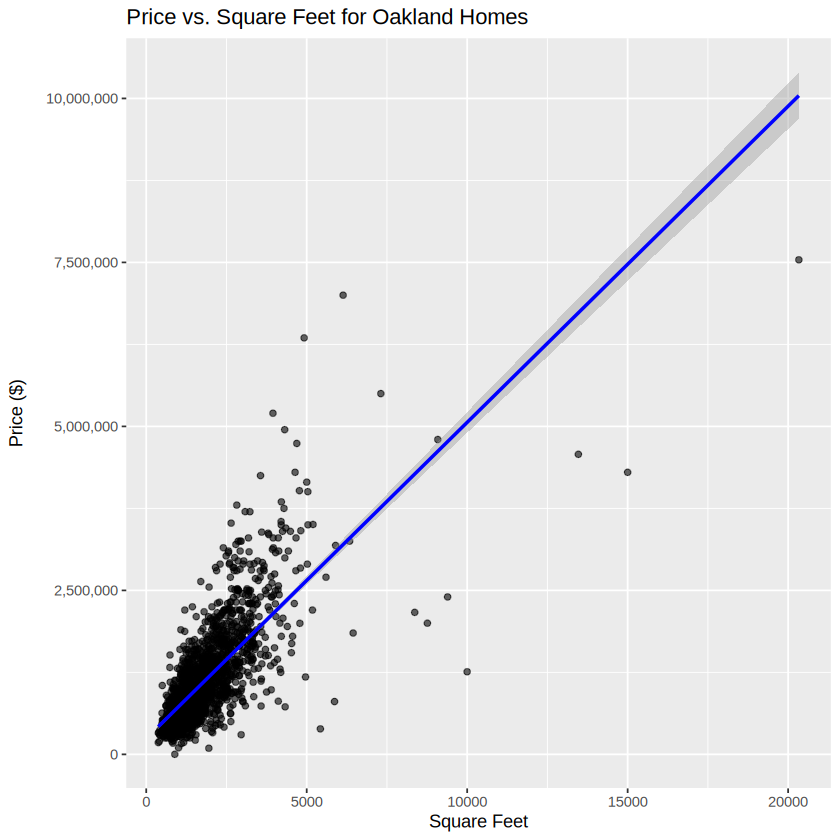

In [4]:
# Load libraries
library(tidyverse)

# Load the data
homes_df <- read_csv("data/oaklandredfin.csv", name_repair = 'universal')

homes_df <- homes_df %>%
  mutate(PRICE = as.numeric(PRICE) / 1e5) %>%   # divide by 100,000 instead of 2,000,000
  filter(!is.na(PRICE) & PRICE > 0)

# Filter only for Oakland
oakland_homes <- homes_df %>%
  filter(CITY == "Oakland")

# Run the linear regression
model <- lm(PRICE ~ SQUARE.FEET, data = oakland_homes)

# View summary of results
summary(model)

# Plot
ggplot(oakland_homes, aes(x = SQUARE.FEET, y = PRICE)) +
  geom_point(alpha = 0.6) +
  geom_smooth(method = "lm", color = "blue") +
  scale_y_continuous(
    labels = function(x) scales::comma(x * 1e5)  # rescale back to full dollar labels
  ) +
  labs(
    title = "Price vs. Square Feet for Oakland Homes",
    x = "Square Feet",
    y = "Price ($)"
  )


**QUESTION 2:** Run a simple linear regression taking the following form:
𝑆𝐴𝐿𝐸.𝑃𝑅𝐼𝐶𝐸 = β0 + β₁ 𝑆𝑄𝑈𝐴𝑅𝐸.𝐹𝐸𝐸𝑇 + 𝜖 Interpret β₁ and its statistical significance.

<span style="font-size:150%;color:green"> 
β₁ SQUARE.FEET = 0.0058720 → For every additional square foot of living space, the home’s price increases by about $587, on average, holding all else constant.
<br>
The p-value is 2.2e-16 (2×10−16=0.0000000000000002), which is very small highly statistically significant. In this context, this value suggests there is a very strong positive association between square footage and home price in Oakland.
</span>

New names:
• `SALE TYPE` -> `SALE.TYPE`
• `SOLD DATE` -> `SOLD.DATE`
• `PROPERTY TYPE` -> `PROPERTY.TYPE`
• `STATE OR PROVINCE` -> `STATE.OR.PROVINCE`
• `ZIP OR POSTAL CODE` -> `ZIP.OR.POSTAL.CODE`
• `SQUARE FEET` -> `SQUARE.FEET`
• `LOT SIZE` -> `LOT.SIZE`
• `YEAR BUILT` -> `YEAR.BUILT`
• `DAYS ON MARKET` -> `DAYS.ON.MARKET`
• `$/SQUARE FEET` -> `..SQUARE.FEET`
• `HOA/MONTH` -> `HOA.MONTH`
• `NEXT OPEN HOUSE START TIME` -> `NEXT.OPEN.HOUSE.START.TIME`
• `NEXT OPEN HOUSE END TIME` -> `NEXT.OPEN.HOUSE.END.TIME`
• `URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR
  INFO ON PRICING)` ->
  `URL..SEE.https...www.redfin.com.buy.a.home.comparative.market.analysis.FOR.INFO.ON.PRICING.`
• `MLS#` -> `MLS.`
Rows: 2237 Columns: 27
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (13): SALE.TYPE, SOLD.DATE, PROPERTY.TYPE, ADDRESS, CITY, STATE.OR.PROVI...
dbl (11): ZIP.OR.POSTAL.CODE, PRICE, BEDS, BATHS, SQUARE.FEET, LOT.SI


Call:
lm(formula = PRICE ~ SQUARE.FEET + BEDS + BATHS, data = homes_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-46.047  -2.414  -0.590   1.801  33.932 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.7305940  0.2530880   6.838 1.07e-11 ***
SQUARE.FEET  0.0057024  0.0002041  27.940  < 2e-16 ***
BEDS        -0.6816310  0.1232281  -5.531 3.61e-08 ***
BATHS        0.5789200  0.1766891   3.276  0.00107 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.716 on 1934 degrees of freedom
Multiple R-squared:  0.5779,	Adjusted R-squared:  0.5772 
F-statistic: 882.5 on 3 and 1934 DF,  p-value: < 2.2e-16


Regression equation:
PRICE = 1.731 + 0.006 * SQUARE.FEET + -0.682 * BEDS + 0.579 * BATHS


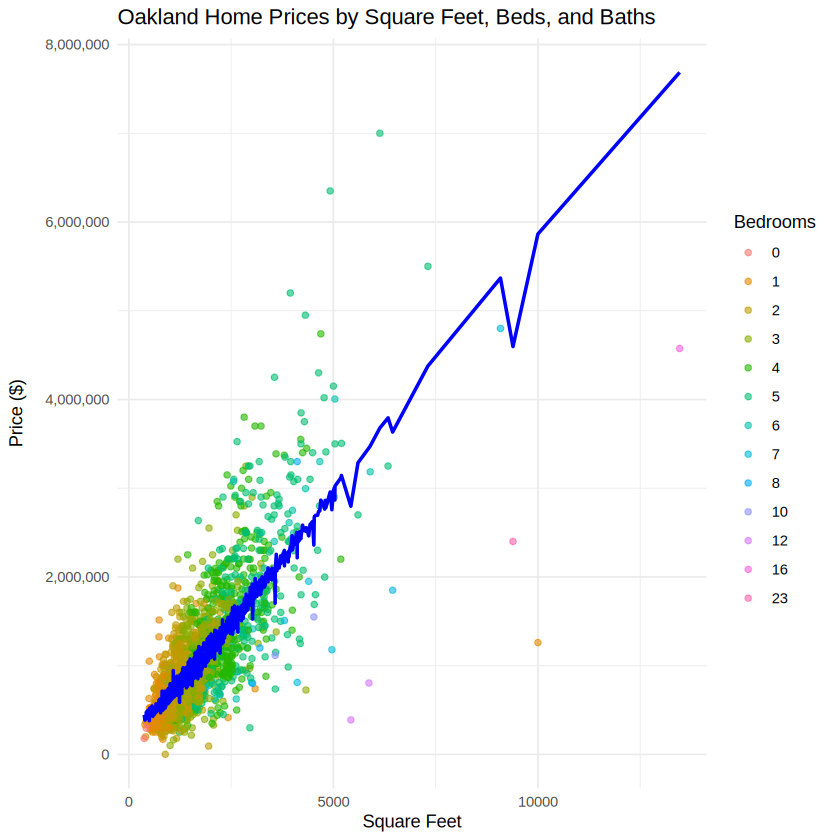

In [5]:
# Load libraries
library(tidyverse)

# Load the data
homes_df <- read_csv("data/oaklandredfin.csv", name_repair = 'universal')

# Clean and prepare the data
homes_df <- homes_df %>%
  mutate(
    PRICE = as.numeric(PRICE) / 1e5,      # convert to hundred-thousands
    BEDS = as.numeric(BEDS),
    BATHS = as.numeric(BATHS),
    SQUARE.FEET = as.numeric(SQUARE.FEET)
  ) %>%
  filter(
    !is.na(PRICE) & PRICE > 0,
    !is.na(SQUARE.FEET),
    !is.na(BEDS),
    !is.na(BATHS),
    CITY == "Oakland"
  )

# Run multiple regression
model <- lm(PRICE ~ SQUARE.FEET + BEDS + BATHS, data = homes_df)

# View summary
summary(model)

# Regression equation (in text)
cat("Regression equation:\nPRICE =",
    round(coef(model)[1], 3), "+",
    round(coef(model)[2], 3), "* SQUARE.FEET +",
    round(coef(model)[3], 3), "* BEDS +",
    round(coef(model)[4], 3), "* BATHS\n")

# Plot predicted vs actual prices, colored by number of beds
homes_df <- homes_df %>%
  mutate(predicted = predict(model, newdata = homes_df))

ggplot(homes_df, aes(x = SQUARE.FEET, y = PRICE, color = factor(BEDS))) +
  geom_point(alpha = 0.6) +
  geom_line(aes(y = predicted), color = "blue", linewidth = 1) +
  scale_y_continuous(labels = function(x) scales::comma(x * 1e5)) +
  labs(
    title = "Oakland Home Prices by Square Feet, Beds, and Baths",
    x = "Square Feet",
    y = "Price ($)",
    color = "Bedrooms"
  ) +
  theme_minimal()


**QUESTION 3:** Run a regression model with the additional explanatory variables of BEDS and BATHS (in addition to SQUARE.FEET). Write out the regression equation. What do you notice about the additional coefficients and how existing coefficients change?

<span style="font-size:150%;color:green"> 
<p>The regression equation after adding BEDS and BATHS is: 
PRICE= B0 + [# of square feet] × SQUARE.FEET + [# of beds] × BEDS + [# of baths] × BATHS. The cost per square feet changed by a very small amount (from 0.0058720 to 0.0058152)</p>
<span style="font-size:150%;color:green"></span>
<p>BEDS =  -1.5152935 -> If you increase the number of bedrooms by 1, while holding total square footage and number of bathrooms constant, the model predicts a $151,500 decrease in price. The p-value is 5.65e-05 (0.0000565), which means bedrooms are statistically significant because the number of bedrooms and square footage is related to the price.</p></span>
<span style="font-size:150%;color:green"> 
<p>BATHS = 1.6088622  -> Holding square footage and number of bedrooms constant, each additional bathroom increases price by about $160,900 on average. The p-value for this variable is 0.00201 which is statistically significant, but not as much as the BEDS variable is.</p></span>



In [6]:
library(tidyverse)

# Load the data
homes_df <- read_csv("data/oaklandredfin.csv", name_repair = 'universal')

# Clean and keep only Oakland
homes_df <- homes_df %>%
  mutate(
    PRICE        = as.numeric(PRICE) / 1e5,  # price in hundred-thousands
    BEDS         = as.numeric(BEDS),
    BATHS        = as.numeric(BATHS),
    SQUARE.FEET  = as.numeric(SQUARE.FEET)
  ) %>%
  filter(
    !is.na(PRICE) & PRICE > 0,
    !is.na(SQUARE.FEET),
    !is.na(BEDS),
    !is.na(BATHS),
    CITY == "Oakland"
  )

# Model 1: sqft only
model1 <- lm(PRICE ~ SQUARE.FEET, data = homes_df)

# Model 2: sqft + beds + baths
model2 <- lm(PRICE ~ SQUARE.FEET + BEDS + BATHS, data = homes_df)


New names:
• `SALE TYPE` -> `SALE.TYPE`
• `SOLD DATE` -> `SOLD.DATE`
• `PROPERTY TYPE` -> `PROPERTY.TYPE`
• `STATE OR PROVINCE` -> `STATE.OR.PROVINCE`
• `ZIP OR POSTAL CODE` -> `ZIP.OR.POSTAL.CODE`
• `SQUARE FEET` -> `SQUARE.FEET`
• `LOT SIZE` -> `LOT.SIZE`
• `YEAR BUILT` -> `YEAR.BUILT`
• `DAYS ON MARKET` -> `DAYS.ON.MARKET`
• `$/SQUARE FEET` -> `..SQUARE.FEET`
• `HOA/MONTH` -> `HOA.MONTH`
• `NEXT OPEN HOUSE START TIME` -> `NEXT.OPEN.HOUSE.START.TIME`
• `NEXT OPEN HOUSE END TIME` -> `NEXT.OPEN.HOUSE.END.TIME`
• `URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR
  INFO ON PRICING)` ->
  `URL..SEE.https...www.redfin.com.buy.a.home.comparative.market.analysis.FOR.INFO.ON.PRICING.`
• `MLS#` -> `MLS.`
Rows: 2237 Columns: 27
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (13): SALE.TYPE, SOLD.DATE, PROPERTY.TYPE, ADDRESS, CITY, STATE.OR.PROVI...
dbl (11): ZIP.OR.POSTAL.CODE, PRICE, BEDS, BATHS, SQUARE.FEET, LOT.SI

In [7]:
# install.packages("stargazer")  # if you haven't yet
library(stargazer)

stargazer(
  model1, model2,
  type = "text",   # use "latex" or "html" if you need those
  title = "Comparison of Models for Oakland Home Prices",
  dep.var.labels = "Price (hundred-thousands)",
  column.labels = c("Sqft only", "Sqft + Beds + Baths"),
  covariate.labels = c("Square feet", "Beds", "Baths"),
  keep.stat = c("n", "rsq", "adj.rsq", "f", "ser")
)



Please cite as: 


 Hlavac, Marek (2022). stargazer: Well-Formatted Regression and Summary Statistics Tables.

 R package version 5.2.3. https://CRAN.R-project.org/package=stargazer 





Comparison of Models for Oakland Home Prices
                                     Dependent variable:                 
                    -----------------------------------------------------
                                  Price (hundred-thousands)              
                             Sqft only             Sqft + Beds + Baths   
                                (1)                        (2)           
-------------------------------------------------------------------------
Square feet                  0.005***                   0.006***         
                             (0.0001)                   (0.0002)         
                                                                         
Beds                                                    -0.682***        
                                                         (0.123)         
                                                                         
Baths                                                   0.579***  

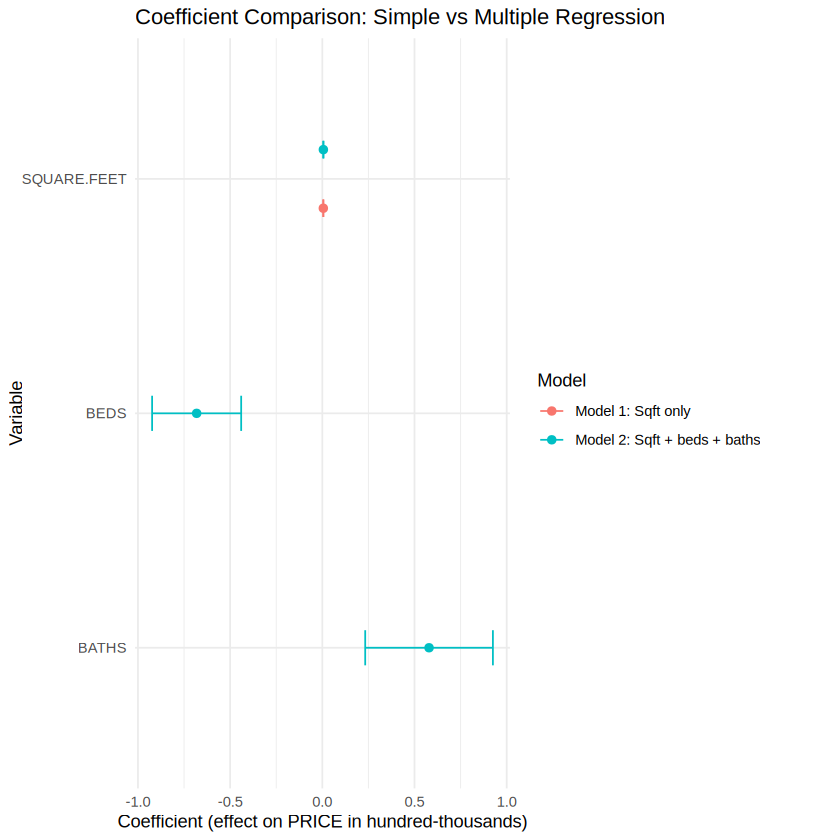

In [8]:
# install.packages("broom")  # if needed
library(broom)

coefs <- bind_rows(
  tidy(model1) %>% mutate(model = "Model 1: Sqft only"),
  tidy(model2) %>% mutate(model = "Model 2: Sqft + beds + baths")
) %>%
  filter(term != "(Intercept)")  # drop intercept for clarity

ggplot(coefs, aes(x = term, y = estimate, color = model)) +
  geom_point(position = position_dodge(width = 0.5), size = 2) +
  geom_errorbar(
    aes(ymin = estimate - 1.96 * std.error,
        ymax = estimate + 1.96 * std.error),
    position = position_dodge(width = 0.5),
    width = 0.15
  ) +
  coord_flip() +
  labs(
    title = "Coefficient Comparison: Simple vs Multiple Regression",
    x = "Variable",
    y = "Coefficient (effect on PRICE in hundred-thousands)",
    color = "Model"
  ) +
  theme_minimal()


In [9]:
library(ggplot2)
library(dplyr)
library(readr)
library(leaflet)
library(sf)
library(stringr)
library(lubridate)
library(htmltools)

# --- 1. Load redlining GeoJSON ---
oakland_sf <- st_read("data/oakland_redlining.geojson", quiet = TRUE)
oakland_sf_valid <- st_make_valid(oakland_sf)
oakland_label_points <- st_point_on_surface(oakland_sf_valid)

# --- 2. Load and filter house data ---
homes_df <- read_csv("data/oaklandredfin.csv")

oakland_homes <- homes_df %>%
  filter(tolower(CITY) == "oakland") %>%
  mutate(
    PRICE_CATEGORY = case_when(
      PRICE < 500000 ~ "Below $500K",
      PRICE >= 500000 & PRICE < 1000000 ~ "$501K - $999K",
      PRICE >= 1000000 & PRICE < 1500000 ~ "$1M - $1.49M",
      PRICE >= 1500000 ~ "Above $1.5M"
    ),
    COLOR = case_when(
      PRICE_CATEGORY == "Below $500K" ~ "blue",
      PRICE_CATEGORY == "$501K - $999K" ~ "gold",
      PRICE_CATEGORY == "$1M - $1.49M" ~ "purple",
      PRICE_CATEGORY == "Above $1.5M" ~ "red"
    )
  )

# --- 3. Load and clean crime data ---
crime_df <- read_csv("data/CrimeWatch_Maps_Past_90-Days_20251102.csv", show_col_types = FALSE)

crime_df_clean <- crime_df %>%
  filter(!is.na(Location), str_trim(Location) != "") %>%
  mutate(DATETIME = ymd_hms(DATETIME, quiet = TRUE)) %>%
  filter(!is.na(DATETIME)) %>%
  # Use today's date as reference (not Sys.time())
  filter(DATETIME >= (as_datetime(Sys.Date()) - days(14)))

crime_sf <- st_as_sf(crime_df_clean, wkt = "Location", crs = 4326, remove = FALSE) %>%
  mutate(
    LON = st_coordinates(.)[, 1],
    LAT = st_coordinates(.)[, 2]
  ) %>%
  filter(!is.na(LON) & !is.na(LAT))

# --- 4. Define HOLC and crime colors ---
holc_colors <- c("A" = "green", "B" = "blue", "C" = "yellow", "D" = "red")

crime_clean <- crime_sf %>%
  mutate(
    CRIME_CATEGORY = case_when(
      str_detect(toupper(CRIMETYPE), "ASSAULT|ROBBERY|HOMICIDE") ~ "Violent Crime",
      str_detect(toupper(CRIMETYPE), "BURGLARY|THEFT|VEHICLE") ~ "Property Crime",
      TRUE ~ "Other"
    ),
    CRIME_COLOR = case_when(
      CRIME_CATEGORY == "Violent Crime" ~ "red",
      CRIME_CATEGORY == "Property Crime" ~ "orange",
      TRUE ~ "gray"
    )
  )

# --- 5. Label text color for HOLC grades ---
oakland_label_points <- oakland_label_points %>%
  mutate(
    label_color = case_when(
      grade %in% c("B", "D") ~ "white",
      TRUE ~ "black"
    )
  )

# ============================
# 1️⃣ Redlining / HOLC only
# ============================
map_redlining <- leaflet() %>%
  addProviderTiles(providers$CartoDB.Positron) %>%
  addPolygons(
    data = oakland_sf_valid,
    color = "black",
    weight = 1,
    fillColor = ~ifelse(!is.na(grade) & grade %in% names(holc_colors),
                        holc_colors[grade],
                        "gray"),
    fillOpacity = 0.55,
    popup = ~paste0("<b>HOLC Area:</b> ", label, "<br>",
                    "<b>Grade:</b> ", ifelse(is.na(grade), "No Grade", grade))
  ) %>%
  addLabelOnlyMarkers(
    data = oakland_label_points,
    label = ~grade,
    labelOptions = labelOptions(
      textsize = "14px",
      fontWeight = "bold",
      opacity = 0.9,
      textOnly = TRUE,
      style = list("color" = oakland_label_points$label_color)
    )
  ) %>%
  addLegend(
    position = "bottomleft",
    colors = c(holc_colors, "gray"),
    labels = c("A - BEST", "B - STILL DESIRABLE", "C - DECLINING", "D - HAZARDOUS", "No Grade"),
    title = "HOLC Redlining Grade"
  ) %>%
  setView(lng = -122.2711, lat = 37.8044, zoom = 12)

# ============================
# 2️⃣ Homes only
# ============================
map_homes <- leaflet() %>%
  addProviderTiles(providers$CartoDB.Positron) %>%
  addCircleMarkers(
    data = oakland_homes,
    lng = ~LONGITUDE, lat = ~LATITUDE,
    radius = 8, color = "white", weight = 1,
    fillColor = ~COLOR, fillOpacity = 0.9,
    popup = ~paste0("<b>Price:</b> $", formatC(PRICE, format = "f", big.mark = ",", digits = 0),
                    "<br><b>Category:</b> ", PRICE_CATEGORY)
  ) %>%
  addLegend(
    position = "bottomright",
    colors = c("blue", "gold", "purple", "red"),
    labels = c("Below $500K", "$501K - $999K", "$1M - $1.49M", "Above $1.5M"),
    title = "Home Price Range"
  ) %>%
  setView(lng = -122.2711, lat = 37.8044, zoom = 12)

# ============================
# 3️⃣ Crimes only (Last 14 Days)
# ============================
map_crimes <- leaflet() %>%
  addProviderTiles(providers$CartoDB.Positron) %>%
  addCircleMarkers(
    data = crime_clean,
    lng = ~LON, lat = ~LAT,
    radius = 3.5, color = "white", weight = 1,
    fillColor = ~CRIME_COLOR, fillOpacity = 0.9,
    popup = ~paste0("<b>Crime:</b> ", DESCRIPTION,
                    "<br><b>Type:</b> ", CRIMETYPE,
                    "<br><b>Date:</b> ", DATETIME,
                    "<br><b>Category:</b> ", CRIME_CATEGORY)
  ) %>%
  addLegend(
    position = "bottomright",
    colors = c("red", "orange", "gray"),
    labels = c("Violent Crime", "Property Crime", "Other"),
    title = "Crime Type (Last 14 Days)"
  ) %>%
  setView(lng = -122.2711, lat = 37.8044, zoom = 12)

# ============================
# 4️⃣ Target Stores in Oakland
# ============================
target_df <- read_csv("data/target.csv", show_col_types = FALSE)

oakland_targets <- target_df %>%
  filter(str_detect(str_to_lower(Address.County), "oakland|alameda")) %>%
  select(Name, Address.FormattedAddress, Address.Latitude, Address.Longitude, OperatingHours..timeFormat)

map_targets <- leaflet() %>%
  addProviderTiles(providers$CartoDB.Positron) %>%
  addCircleMarkers(
    data = oakland_targets,
    lng = ~Address.Longitude,
    lat = ~Address.Latitude,
    radius = 12,
    color = "darkred",
    fillColor = "red",
    fillOpacity = 0.8,
    weight = 2,
    popup = ~paste0(
      "<b>Store Name:</b> ", Name, "<br>",
      "<b>Address:</b> ", Address.FormattedAddress, "<br>",
      "<b>Hours:</b> ", OperatingHours..timeFormat
    )
  ) %>%
  addLegend(
    position = "bottomright",
    colors = "red",
    labels = "Target Store",
    title = "Target Locations"
  ) %>%
  setView(lng = -122.2711, lat = 37.8044, zoom = 11)

# ============================
# 5️⃣ Combined Map (Dynamic Layers)
# ============================

holc_colors <- c("A" = "#1a9850", "B" = "#91cf60", "C" = "#fee08b", "D" = "#d73027")
home_price_colors <- c("blue", "gold", "purple", "red")
crime_colors <- c("red", "orange", "gray")

map_combined <- leaflet() %>%
  addProviderTiles(providers$CartoDB.Positron) %>%
  
  addPolygons(
    data = oakland_sf_valid, group = "Redlining (HOLC)",
    color = "black", weight = 1,
    fillColor = ~ifelse(!is.na(grade) & grade %in% names(holc_colors),
                        holc_colors[grade],
                        "gray"),
    fillOpacity = 0.55,
    popup = ~paste0("<b>HOLC Area:</b> ", label,
                    "<br><b>Grade:</b> ", ifelse(is.na(grade), "No Grade", grade))
  ) %>%
  
  addCircleMarkers(
    data = oakland_homes, group = "Homes",
    lng = ~LONGITUDE, lat = ~LATITUDE,
    radius = 8, color = "white", weight = 1,
    fillColor = ~COLOR, fillOpacity = 0.9,
    popup = ~paste0("<b>Price:</b> $", formatC(PRICE, format = "f", big.mark = ",", digits = 0),
                    "<br><b>Category:</b> ", PRICE_CATEGORY)
  ) %>%
  
  addCircleMarkers(
    data = crime_clean, group = "Crimes (14 Days)",
    lng = ~LON, lat = ~LAT,
    radius = 3.5, color = "white", weight = 1,
    fillColor = ~CRIME_COLOR, fillOpacity = 0.9,
    popup = ~paste0("<b>Crime:</b> ", DESCRIPTION,
                    "<br><b>Type:</b> ", CRIMETYPE,
                    "<br><b>Date:</b> ", DATETIME,
                    "<br><b>Category:</b> ", CRIME_CATEGORY)
  ) %>%
  
  addCircleMarkers(
    data = oakland_targets, group = "Targets",
    lng = ~Address.Longitude, lat = ~Address.Latitude,
    radius = 12, color = "darkred", weight = 2,
    fillColor = "red", fillOpacity = 0.8,
    popup = ~paste0("<b>Store Name:</b> ", Name, "<br>",
                    "<b>Address:</b> ", Address.FormattedAddress, "<br>",
                    "<b>Hours:</b> ", OperatingHours..timeFormat)
  ) %>%
  
  addLayersControl(
    overlayGroups = c("Redlining (HOLC)", "Homes", "Crimes (14 Days)", "Targets"),
    options = layersControlOptions(collapsed = FALSE)
  ) %>%
  
  addLegend(
    position = "bottomleft",
    colors = c(holc_colors, "gray"),
    labels = c("A - BEST", "B - STILL DESIRABLE", "C - DECLINING", "D - HAZARDOUS", "No Grade"),
    title = "HOLC Redlining Grade"
  ) %>%
  addLegend(
    position = "bottomright",
    colors = home_price_colors,
    labels = c("Below $500K", "$501K - $999K", "$1M - $1.49M", "Above $1.5M"),
    title = "Home Price Range"
  ) %>%
  addLegend(
    position = "topright",
    colors = crime_colors,
    labels = c("Violent Crime", "Property Crime", "Other"),
    title = "Crime Type (Last 14 Days)"
  ) %>%
  
  setView(lng = -122.2711, lat = 37.8044, zoom = 12)

# --- View maps individually or together ---
map_redlining
map_homes
map_crimes
map_targets
map_combined


Linking to GEOS 3.12.1, GDAL 3.8.4, PROJ 9.4.0; sf_use_s2() is TRUE

Warning message:
“st_point_on_surface assumes attributes are constant over geometries”
Warning message in st_point_on_surface.sfc(st_geometry(x)):
“st_point_on_surface may not give correct results for longitude/latitude data”
Rows: 2237 Columns: 27
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (13): SALE TYPE, SOLD DATE, PROPERTY TYPE, ADDRESS, CITY, STATE OR PROVI...
dbl (11): ZIP OR POSTAL CODE, PRICE, BEDS, BATHS, SQUARE FEET, LOT SIZE, YEA...
lgl  (3): DAYS ON MARKET, NEXT OPEN HOUSE START TIME, NEXT OPEN HOUSE END TIME

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


HTML widgets cannot be represented in plain text (need html)

HTML widgets cannot be represented in plain text (need html)

HTML widgets cannot be represented in plain text (need html)

HTML widgets cannot be represented in plain text (need html)

HTML widgets cannot be represented in plain text (need html)

**QUESTION 3:** Based on your knowledge of the city, what other variable(s) would you include to better predict residential home prices? Go ahead and collect the data for (a small sample of) your homes. Interpret your additional results and use them appropriately. You can also consider different models or model specifications. Argued for the importance of your additional analysis for identifying investment opportunities. Be creative!


<p style="font-size:150%; color:green;">
  Redlining was a discriminatory practice in the United States where banks, insurance companies, 
  and the government refused to offer loans, mortgages, or insurance to people living in certain 
  neighborhoods — mostly communities of color, especially Black neighborhoods.
</p>

<p style="font-size:150%; color:green;">
  The term comes from the 1930s, when the federal government created maps to assess the risk of 
  giving home loans in different areas. Lenders would literally draw red lines around these 
  neighborhoods and deny financial services to people living there, regardless of their individual 
  creditworthiness. Redlining had long-lasting effects:
</p>

<ul style="font-size:150%; color:green;">
  <li>
    It prevented families of color from buying homes, which is one of the main ways Americans build wealth.
  </li>
  <li>
    It led to disinvestment in redlined neighborhoods — fewer jobs, worse schools, and poor infrastructure.
  </li>
  <li>
    It contributed to racial segregation and economic inequality that 
    <b style="color:red;">evidently</b> still exists today.
  </li>
</ul>


</span>


# BART proximity calc
Compute distance from each Redfin listing to the nearest BART station, add distance_to_bart_miles and within_0_5_miles_bart.


In [10]:
# BART proximity analysis (R)
# - Clean listings and station data
# - Compute nearest BART distance
# - Add distance_to_bart_miles and within_0_5_miles_bart

suppressPackageStartupMessages({
  library(tidyverse)
  library(sf)
  library(xml2)
  library(purrr)
})

sf::sf_use_s2(TRUE)

# Ensure homes_df exists; otherwise read CSV
if (!exists("homes_df")) {
  homes_df <- readr::read_csv("data/oaklandredfin.csv", show_col_types = FALSE)
}

# Clean: coerce key fields and drop obvious junk (missing coords)
homes_df <- homes_df %>%
  mutate(
    LATITUDE = suppressWarnings(as.numeric(LATITUDE)),
    LONGITUDE = suppressWarnings(as.numeric(LONGITUDE)),
    PRICE = suppressWarnings(as.numeric(PRICE))
  )

homes_with_coords_idx <- which(!is.na(homes_df$LATITUDE) & !is.na(homes_df$LONGITUDE))
if (length(homes_with_coords_idx) == 0) {
  stop("No listings with valid LATITUDE/LONGITUDE found.")
}

homes_sf <- sf::st_as_sf(
  homes_df[homes_with_coords_idx, ],
  coords = c("LONGITUDE", "LATITUDE"), crs = 4326, remove = FALSE
)

# Load BART stations from KMZ (doc.kml inside)
kmz_path <- if (file.exists("data/BART_Stations_2025.kmz")) "data/BART_Stations_2025.kmz" else "402/data/BART_Stations_2025.kmz"
.tmpdir <- tempfile("bart_kmz_")
dir.create(.tmpdir, showWarnings = FALSE)
utils::unzip(kmz_path, files = "doc.kml", exdir = .tmpdir, overwrite = TRUE)

kml <- xml2::read_xml(file.path(.tmpdir, "doc.kml"))

# Extract station names and coordinates using namespace-agnostic XPath
pls <- xml2::xml_find_all(kml, ".//*[local-name()='Placemark']")

get_one <- function(pm) {
  nm <- xml2::xml_text(xml2::xml_find_first(pm, ".//*[local-name()='name']"))
  ct <- xml2::xml_text(xml2::xml_find_first(pm, ".//*[local-name()='Point']/*[local-name()='coordinates']"))
  if (is.na(ct) || is.na(nm) || is.null(ct) || ct == "") return(NULL)
  pts <- strsplit(trimws(ct), ",")[[1]]
  lon <- suppressWarnings(as.numeric(pts[1]))
  lat <- suppressWarnings(as.numeric(pts[2]))
  if (is.na(lon) || is.na(lat)) return(NULL)
  tibble::tibble(station_name = nm, longitude = lon, latitude = lat)
}

stations_df <- purrr::map(pls, get_one) %>%
  dplyr::bind_rows() %>%
  filter(!is.na(longitude), !is.na(latitude)) %>%
  distinct(station_name, longitude, latitude, .keep_all = TRUE)

stations_sf <- sf::st_as_sf(stations_df, coords = c("longitude", "latitude"), crs = 4326, remove = FALSE)

# Compute nearest station distance (miles)
nearest_idx <- sf::st_nearest_feature(homes_sf, stations_sf)
nearest_dist_m <- sf::st_distance(homes_sf, stations_sf[nearest_idx, ], by_element = TRUE)
nearest_dist_miles <- as.numeric(nearest_dist_m) / 1609.344

# Attach back to full homes_df
.dist_full <- rep(NA_real_, nrow(homes_df))
.dist_full[homes_with_coords_idx] <- nearest_dist_miles

homes_df <- homes_df %>%
  mutate(
    distance_to_bart_miles = .dist_full,
    within_0_5_miles_bart = as.integer(!is.na(distance_to_bart_miles) & distance_to_bart_miles <= 0.5)
  )

# Inspection outputs
message("BART stations parsed: ", nrow(stations_sf))
message("Listings with coordinates: ", length(homes_with_coords_idx))

# Show columns inferred from homes_df and a sample of stations
print(head(dplyr::select(homes_df,
  ADDRESS, CITY, LATITUDE, LONGITUDE, PRICE, distance_to_bart_miles, within_0_5_miles_bart
)))
print(head(dplyr::select(stations_df, station_name, latitude, longitude)))


BART stations parsed: 52

Listings with coordinates: 2237



# A tibble: 6 × 7
  ADDRESS               CITY    LATITUDE LONGITUDE  PRICE distance_to_bart_miles
  <chr>                 <chr>      <dbl>     <dbl>  <dbl>                  <dbl>
1 3369 Arkansas St      Oakland     37.8     -122. 6.17e5                  1.60 
2 6846 Saroni Dr        Oakland     37.8     -122. 7.6 e5                  2.90 
3 1004 39th St          Emeryv…     37.8     -122. 2.62e5                  0.553
4 200 Caldecott Ln #106 Oakland     37.9     -122. 3.60e5                  1.89 
5 5101 McDonell Ave     Oakland     37.8     -122. 2.5 e5                  2.64 
6 71 Norman Ln          Oakland     37.8     -122. 1.02e6                  0.997
# ℹ 1 more variable: within_0_5_miles_bart <int>
# A tibble: 6 × 3
  station_name             latitude longitude
  <chr>                       <dbl>     <dbl>
1 Milpitas                     37.4     -122.
2 Berryessa/North San José     37.4     -122.
3 Civic Center/UN Plaza        37.8     -122.
4 Concord                      38.0  

In [11]:
names(homes_df)
summary(homes_df$distance_to_bart_miles)
table(homes_df$within_0_5_miles_bart)


[1] "SALE TYPE"                                                                                  
 [2] "SOLD DATE"                                                                                  
 [3] "PROPERTY TYPE"                                                                              
 [4] "ADDRESS"                                                                                    
 [5] "CITY"                                                                                       
 [6] "STATE OR PROVINCE"                                                                          
 [7] "ZIP OR POSTAL CODE"                                                                         
 [8] "PRICE"                                                                                      
 [9] "BEDS"                                                                                       
[10] "BATHS"                                                                                      
[11] "LOCATION"                                                                                   
[12] "SQUARE FEET"                                                                                
[13] "LOT SIZE"                                                                                   
[14] "YEAR BUILT"                                                                                 
[15] "DAYS ON MARKET"                                                                             
[16] "$/SQUARE FEET"                                                                              
[17] "HOA/MONTH"                                                                                  
[18] "STATUS"                                                                                     
[19] "NEXT OPEN HOUSE START TIME"                                                                 
[20] "NEXT OPEN HOUSE END TIME"                                                                   
[21] "URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)"
[22] "SOURCE"                                                                                     
[23] "MLS#"                                                                                       
[24] "FAVORITE"                                                                                   
[25] "INTERESTED"                                                                                 
[26] "LATITUDE"                                                                                   
[27] "LONGITUDE"                                                                                  
[28] "distance_to_bart_miles"                                                                     
[29] "within_0_5_miles_bart"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.09283 0.77284 1.33245 1.49911 2.13287 3.84201 


   0    1 
2008  229 

In [12]:
set.seed(402)  # optional, for reproducible sample
homes_df %>%
  dplyr::sample_n(10) %>%
  dplyr::select(
    ADDRESS, CITY, LATITUDE, LONGITUDE, PRICE,
    distance_to_bart_miles, within_0_5_miles_bart
  )


ADDRESS             CITY     LATITUDE LONGITUDE PRICE  
1  2415 Scenic Ave     Oakland  37.80195 -122.2114  820000
2  5887 Margarido Dr   Oakland  37.84466 -122.2421 2680000
3  38 Windward Hl      Oakland  37.85286 -122.2271 1700000
4  5 Captains Cv       Oakland  37.85610 -122.2260 1700000
5  1669 13th St        Oakland  37.81151 -122.2965  350000
6  103 Alvarado Rd     Berkeley 37.85789 -122.2396 3200000
7  9709 Coral Rd       Oakland  37.73170 -122.1909  275000
8  4392 Terrabella Pl  Oakland  37.79595 -122.1785 1065000
9  6296 Rocky Point Ct Oakland  37.77862 -122.1623  900000
10 4184 Manila Ave     Oakland  37.83079 -122.2569 1250000
   distance_to_bart_miles within_0_5_miles_bart
1  1.9955347              0                    
2  0.5049514              0                    
3  1.4334272              0                    
4  1.5891643              0                    
5  0.4631934              1                    
6  1.1122170              0                    
7  1.4524828              0                    
8  2.8883962              0                    
9  2.5535283              0                    
10 0.5684769              0

# Quality School proximity calc
Compute distance from each Redfin listing to the nearest quality school station, add distance_to_school_miles and within_2_miles_school.


In [13]:
## School quality proximity (CDE data → homes_df)
install.packages("geosphere")
library(tidyverse)
library(geosphere)


# <-- Add this line (or run it again if you already had it)
data_dir <- "data"


# Helper: pick the first existing column name from a set of candidates
choose_col <- function(df, candidates) {
  found <- candidates[candidates %in% names(df)]
  if (length(found) == 0) {
    stop("None of these columns found: ", paste(candidates, collapse = ", "))
  }
  found[[1]]
}


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘geosphere’


The following object is masked from ‘package:htmltools’:

    span




In [14]:
pubschls_raw <- readr::read_tsv(
  file.path(data_dir, "pubschls.txt"),
  col_types = readr::cols(.default = "c")
)

ela_raw <- readr::read_tsv(
  file.path(data_dir, "eladownload2024.txt"),
  col_types = readr::cols(.default = "c")
)

math_raw <- readr::read_tsv(
  file.path(data_dir, "mathdownload2024.txt"),
  col_types = readr::cols(.default = "c")
)



In [15]:
# Resolve key columns
county_col   <- choose_col(pubschls_raw, c("County", "COUNTY"))
city_col     <- choose_col(pubschls_raw, c("City", "CITY"))
status_col   <- choose_col(pubschls_raw, c("StatusType", "Status", "STATUSTYPE"))
cds_col      <- choose_col(pubschls_raw, c("CDSCode", "CDS", "cds", "CDS_CODE"))
district_col <- choose_col(pubschls_raw, c("District", "DistrictName", "DISTRICT", "DistName"))
school_col   <- choose_col(pubschls_raw, c("School", "SchoolName", "SCHOOL", "SchName"))
street_col   <- choose_col(pubschls_raw, c("Street", "Street1", "Street_Name", "PhysicalStreet"))
zip_col      <- choose_col(pubschls_raw, c("Zip", "ZIP", "ZipCode", "Zipcode", "PhysicalZip"))

# OPTIONAL: try to find a "type" column if it exists
type_candidates <- names(pubschls_raw)[
  stringr::str_detect(names(pubschls_raw), regex("type", ignore_case = TRUE))
]
type_col <- if (length(type_candidates) > 0) type_candidates[[1]] else NA_character_

charter_candidates <- c("Charter", "CharterYN", "CharterFlag", "CharterS")
charter_match <- charter_candidates[charter_candidates %in% names(pubschls_raw)]
charter_col <- if (length(charter_match) > 0) charter_match[[1]] else NA_character_

lat_candidates <- c("Latitude", "LATITUDE", "Lat")
lon_candidates <- c("Longitude", "LONGITUDE", "Lon")

lat_match <- lat_candidates[lat_candidates %in% names(pubschls_raw)]
lon_match <- lon_candidates[lon_candidates %in% names(pubschls_raw)]

lat_col <- if (length(lat_match) > 0) lat_match[[1]] else NA_character_
lon_col <- if (length(lon_match) > 0) lon_match[[1]] else NA_character_

# Base cleaning: filter Alameda / Oakland / Active and standardize fields
pubschls_oakland <- pubschls_raw %>%
  mutate(
    county     = str_trim(.data[[county_col]]),
    city_raw   = str_trim(.data[[city_col]]),
    status_raw = str_trim(.data[[status_col]])
  ) %>%
  filter(
    str_to_upper(county) == "ALAMEDA",
    str_to_upper(city_raw) == "OAKLAND",
    str_to_upper(status_raw) == "ACTIVE"
  ) %>%
  mutate(
    cds_code      = str_pad(str_trim(.data[[cds_col]]), width = 14, side = "left", pad = "0"),
    district_name = .data[[district_col]] %>% str_squish() %>% str_to_title(),
    school_name   = .data[[school_col]]   %>% str_squish() %>% str_to_title(),
    street        = .data[[street_col]]   %>% str_squish() %>% str_to_title(),
    city          = city_raw %>% str_squish() %>% str_to_title(),
    zip_code      = .data[[zip_col]] %>% str_extract("\\d{5}"),
    school_type   = if (!is.na(type_col)) .data[[type_col]] else NA_character_
  )

# Charter flag: handle presence/absence of charter column safely
if (!is.na(charter_col)) {
  pubschls_oakland <- pubschls_oakland %>%
    mutate(
      charter_flag = case_when(
        str_to_upper(str_trim(.data[[charter_col]])) %in% c("Y", "YES", "CHARTER") ~ 1L,
        str_trim(.data[[charter_col]]) == "" ~ NA_integer_,
        TRUE ~ 0L
      )
    )
} else {
  pubschls_oakland <- pubschls_oakland %>%
    mutate(charter_flag = NA_integer_)
}

# Latitude / longitude (if present)
if (!is.na(lat_col)) {
  pubschls_oakland <- pubschls_oakland %>%
    mutate(latitude = suppressWarnings(as.numeric(.data[[lat_col]])))
} else {
  pubschls_oakland <- pubschls_oakland %>%
    mutate(latitude = NA_real_)
}

if (!is.na(lon_col)) {
  pubschls_oakland <- pubschls_oakland %>%
    mutate(longitude = suppressWarnings(as.numeric(.data[[lon_col]])))
} else {
  pubschls_oakland <- pubschls_oakland %>%
    mutate(longitude = NA_real_)
}

# Final column selection and de-dup
pubschls_oakland <- pubschls_oakland %>%
  select(
    cds_code,
    district_name,
    school_name,
    street,
    city,
    zip_code,
    school_type,
    charter_flag,
    latitude,
    longitude
  ) %>%
  distinct(cds_code, .keep_all = TRUE)

pubschls_oakland %>% head()

cds_code       district_name                     
1 01100170112607 Alameda County Office Of Education
2 01100170114363 Alameda County Office Of Education
3 01100170123968 Alameda County Office Of Education
4 01100170124172 Alameda County Office Of Education
5 01100170126748 Alameda County Office Of Education
6 01100170129403 Alameda County Office Of Education
  school_name                             
1 Envision Academy For Arts & Technology  
2 American Indian Public Charter School Ii
3 Community School For Creative Education 
4 Yu Ming Charter                         
5 Lps Oakland R & D Campus                
6 Epic Charter                            
  street                                 city    zip_code school_type
1 1515 Webster Street                    Oakland 94612    Active     
2 171 12th Street                        Oakland 94607    Active     
3 2111 International Boulevard           Oakland 94606    Active     
4 2501 Chestnut Street                   Oakland 94607    Active     
5 8601 Macarthur Boulevard, Building 100 Oakland 94605    Active     
6 1045 Derby Avenue                      Oakland 94601    Active     
  charter_flag latitude longitude
1 1            37.80452 -122.2682
2 1            37.80037 -122.2655
3 1            37.78465 -122.2386
4 1            37.81823 -122.2823
5 1            37.75954 -122.1629
6 0            37.77705 -122.2296

In [16]:
clean_dashboard_subject <- function(df_raw, subject_prefix) {
  cds_col         <- choose_col(df_raw, c("CDSCode", "CDS", "cds"))
  rtype_col       <- choose_col(df_raw, c("rtype", "RType"))
  student_col     <- choose_col(df_raw, c("studentgroup", "StudentGroup", "student_group"))
  currstatus_col  <- choose_col(df_raw, c("currstatus", "CurrStatus"))
  statuslevel_col <- choose_col(df_raw, c("statuslevel", "StatusLevel"))
  color_col       <- choose_col(df_raw, c("color", "Color"))
  
  level_to_label <- c(
    `1` = "Very Low / Red",
    `2` = "Low / Orange",
    `3` = "Medium / Yellow",
    `4` = "High / Green",
    `5` = "Very High / Blue"
  )
  
  df_raw %>%
    mutate(
      rtype        = str_to_upper(str_trim(.data[[rtype_col]])),
      studentgroup = str_to_upper(str_trim(.data[[student_col]]))
    ) %>%
    filter(
      rtype == "S",
      studentgroup == "ALL"
    ) %>%
    mutate(
      cds_code = str_pad(str_trim(.data[[cds_col]]), width = 14, side = "left", pad = "0"),
      !!paste0(subject_prefix, "_distance") := suppressWarnings(as.numeric(.data[[currstatus_col]])),
      !!paste0(subject_prefix, "_statuslevel") := suppressWarnings(as.numeric(.data[[statuslevel_col]])),
      !!paste0(subject_prefix, "_color_code") := str_trim(.data[[color_col]]),
      !!paste0(subject_prefix, "_status_label") :=
        recode(as.character(.data[[statuslevel_col]]), !!!level_to_label)
    ) %>%
    select(
      cds_code,
      starts_with(paste0(subject_prefix, "_"))
    ) %>%
    distinct(cds_code, .keep_all = TRUE)
}

ela_clean  <- clean_dashboard_subject(ela_raw,  "ela")
math_clean <- clean_dashboard_subject(math_raw, "math")

ela_clean %>% head()
math_clean %>% head()

cds_code       ela_distance ela_statuslevel ela_color_code ela_status_label
1 01100170112607  -84.8       1               1              Very Low / Red  
2 01100170123968  -82.8       1               1              Very Low / Red  
3 01100170124172   83.8       5               4              Very High / Blue
4 01100170125567  -34.3       2               2              Low / Orange    
5 01100170130401     NA       0               0              0               
6 01100170130419 -218.3       1               0              Very Low / Red

cds_code       math_distance math_statuslevel math_color_code
1 01100170112607 -165.1        1                1              
2 01100170123968 -114.4        1                1              
3 01100170124172   99.5        5                4              
4 01100170125567  -63.3        2                3              
5 01100170130401     NA        0                0              
6 01100170130419 -259.3        1                0              
  math_status_label
1 Very Low / Red   
2 Very Low / Red   
3 Very High / Blue 
4 Low / Orange     
5 0                
6 Very Low / Red

In [17]:
# Merge math + ELA at school level
school_perf <- math_clean %>%
  full_join(ela_clean, by = "cds_code")

# Continuous index: average of math_distance and ela_distance
school_perf <- school_perf %>%
  mutate(
    school_quality_distance = {
      dist_mat <- select(., math_distance, ela_distance) %>%
        mutate(across(everything(), as.numeric)) %>%
        as.matrix()
      
      row_mean <- rowMeans(dist_mat, na.rm = TRUE)
      # if both NA → rowMeans gives NaN, fix that
      both_na <- apply(is.na(dist_mat), 1, all)
      row_mean[both_na] <- NA_real_
      row_mean
    }
  )

# Categorical index: rounded average of math_statuslevel and ela_statuslevel
school_perf <- school_perf %>%
  mutate(
    school_quality_level = {
      lvl_mat <- select(., math_statuslevel, ela_statuslevel) %>%
        mutate(across(everything(), as.numeric)) %>%
        as.matrix()
      
      lvl_mean <- rowMeans(lvl_mat, na.rm = TRUE)
      both_na <- apply(is.na(lvl_mat), 1, all)
      lvl_mean[both_na] <- NA_real_
      as.integer(round(lvl_mean))
    }
  )

# Optional label for school_quality_level
level_to_label <- c(
  `1` = "Very Low / Red",
  `2` = "Low / Orange",
  `3` = "Medium / Yellow",
  `4` = "High / Green",
  `5` = "Very High / Blue"
)

school_perf <- school_perf %>%
  mutate(
    school_quality_label = recode(as.character(school_quality_level), !!!level_to_label)
  )

# Join onto Oakland schools
oakland_schools_perf <- pubschls_oakland %>%
  left_join(school_perf, by = "cds_code")

oakland_schools_perf %>% head()


cds_code       district_name                     
1 01100170112607 Alameda County Office Of Education
2 01100170114363 Alameda County Office Of Education
3 01100170123968 Alameda County Office Of Education
4 01100170124172 Alameda County Office Of Education
5 01100170126748 Alameda County Office Of Education
6 01100170129403 Alameda County Office Of Education
  school_name                             
1 Envision Academy For Arts & Technology  
2 American Indian Public Charter School Ii
3 Community School For Creative Education 
4 Yu Ming Charter                         
5 Lps Oakland R & D Campus                
6 Epic Charter                            
  street                                 city    zip_code school_type
1 1515 Webster Street                    Oakland 94612    Active     
2 171 12th Street                        Oakland 94607    Active     
3 2111 International Boulevard           Oakland 94606    Active     
4 2501 Chestnut Street                   Oakland 94607    Active     
5 8601 Macarthur Boulevard, Building 100 Oakland 94605    Active     
6 1045 Derby Avenue                      Oakland 94601    Active     
  charter_flag latitude longitude ⋯ math_statuslevel math_color_code
1 1            37.80452 -122.2682 ⋯  1               1              
2 1            37.80037 -122.2655 ⋯ NA               NA             
3 1            37.78465 -122.2386 ⋯  1               1              
4 1            37.81823 -122.2823 ⋯  5               4              
5 1            37.75954 -122.1629 ⋯ NA               NA             
6 0            37.77705 -122.2296 ⋯ NA               NA             
  math_status_label ela_distance ela_statuslevel ela_color_code
1 Very Low / Red    -84.8         1              1             
2 NA                   NA        NA              NA            
3 Very Low / Red    -82.8         1              1             
4 Very High / Blue   83.8         5              4             
5 NA                   NA        NA              NA            
6 NA                   NA        NA              NA            
  ela_status_label school_quality_distance school_quality_level
1 Very Low / Red   -124.95                  1                  
2 NA                    NA                 NA                  
3 Very Low / Red    -98.60                  1                  
4 Very High / Blue   91.65                  5                  
5 NA                    NA                 NA                  
6 NA                    NA                 NA                  
  school_quality_label
1 Very Low / Red      
2 NA                  
3 Very Low / Red      
4 Very High / Blue    
5 NA                  
6 NA

In [18]:
q75 <- oakland_schools_perf %>%
  filter(!is.na(school_quality_distance)) %>%
  pull(school_quality_distance) %>%
  as.numeric() %>%
  quantile(probs = 0.75, na.rm = TRUE)

oakland_schools_perf <- oakland_schools_perf %>%
  mutate(
    is_quality_school =
      !is.na(school_quality_distance) &
      school_quality_distance >= q75 &
      !is.na(school_quality_level) &
      school_quality_level >= 4
  )



In [19]:
library(dplyr)
library(tidyr)

# Haversine helper (only needs to be defined once per kernel)
haversine_miles <- function(lat1, lon1, lat2, lon2) {
  rad <- pi / 180
  lat1 <- lat1 * rad
  lon1 <- lon1 * rad
  lat2 <- lat2 * rad
  lon2 <- lon2 * rad
  
  dlat <- lat2 - lat1
  dlon <- lon2 - lon1
  
  a <- sin(dlat / 2)^2 + cos(lat1) * cos(lat2) * sin(dlon / 2)^2
  c <- 2 * asin(pmin(1, sqrt(a)))
  
  earth_radius_miles <- 3958.8
  earth_radius_miles * c
}

# Home lat/lon columns
lat_home_col <- choose_col(homes_df, c("LATITUDE", "Latitude", "lat", "Lat"))
lon_home_col <- choose_col(homes_df, c("LONGITUDE", "Longitude", "lon", "Lon", "lng"))

# Use only strict "quality" schools with valid coords
schools_for_dist <- oakland_schools_perf %>%
  filter(
    is_quality_school,
    !is.na(latitude),
    !is.na(longitude)
  ) %>%
  transmute(
    cds_code,
    school_name,
    school_lat = as.numeric(latitude),
    school_lon = as.numeric(longitude),
    school_quality_distance,
    school_quality_level
  )

if (nrow(schools_for_dist) == 0) {
  warning("No quality schools with valid latitude/longitude; skipping distance features.")
} else {
  # 1) Add an index to homes
  homes_with_idx <- homes_df %>%
    mutate(home_idx = dplyr::row_number())
  
  # 2) Cross join homes × quality schools and compute distances
  pairs <- homes_with_idx %>%
    transmute(
      home_idx,
      home_lat = as.numeric(.data[[lat_home_col]]),
      home_lon = as.numeric(.data[[lon_home_col]])
    ) %>%
    tidyr::crossing(schools_for_dist) %>%
    mutate(
      distance_to_quality_school_miles = haversine_miles(
        home_lat, home_lon,
        school_lat, school_lon
      )
    )
  
  # 3) Nearest quality school per home
  nearest_quality <- pairs %>%
    group_by(home_idx) %>%
    slice_min(distance_to_quality_school_miles, n = 1, with_ties = FALSE) %>%
    ungroup()
  
  # 4) Join back onto homes_df and create the 2-mile flag
  homes_df <- homes_with_idx %>%
    left_join(
      nearest_quality %>%
        select(
          home_idx,
          distance_to_quality_school_miles,
          nearest_quality_school_name             = school_name,
          nearest_quality_school_quality_distance = school_quality_distance,
          nearest_quality_school_quality_level    = school_quality_level
        ),
      by = "home_idx"
    ) %>%
    mutate(
      within_2_miles_quality_school = if_else(
        !is.na(distance_to_quality_school_miles) &
          distance_to_quality_school_miles <= 2,
        1L, 0L
      )
    ) %>%
    select(-home_idx)
}


In [20]:
names(homes_df)[grepl("quality_school", names(homes_df))]

[1] "distance_to_quality_school_miles"       
[2] "nearest_quality_school_name"            
[3] "nearest_quality_school_quality_distance"
[4] "nearest_quality_school_quality_level"   
[5] "within_2_miles_quality_school"

In [21]:
homes_df <- homes_df %>%
  mutate(
    within_0_5_mile_quality_school = if_else(
      !is.na(distance_to_quality_school_miles) &
        distance_to_quality_school_miles <= 0.5,
      1L, 0L
    )
  )


In [22]:
homes_df %>%
  summarise(
    n_homes                     = n(),
    pct_within_0_5_mile_quality = mean(within_0_5_mile_quality_school == 1, na.rm = TRUE) * 100
  )

set.seed(123)
homes_df %>%
  select(
    ADDRESS = `ADDRESS`,
    `ZIP OR POSTAL CODE`,
    distance_to_quality_school_miles,
    within_0_5_mile_quality_school,
    nearest_quality_school_name
  ) %>%
  slice_sample(n = 10)


n_homes pct_within_0_5_mile_quality
1 2237    27.8945

ADDRESS                     ZIP OR POSTAL CODE
1  402 Hiller Dr               94618             
2  1116 16th St                94607             
3  2033 Harrington Ave         94601             
4  6258 Boulder Ln #4801       94605             
5  1009 Winsor Ave             94610             
6  4614 Rockingham Ct          94619             
7  868 44th St                 94608             
8  9057 Skyline Blvd           94611             
9  6907 Chambers Dr            94611             
10 252 International Blvd #103 94606             
   distance_to_quality_school_miles within_0_5_mile_quality_school
1  0.9348404                        0                             
2  0.5112752                        0                             
3  1.3634555                        0                             
4  1.2108160                        0                             
5  0.6422999                        0                             
6  1.4272076                        0                             
7  1.2106267                        0                             
8  0.8712733                        0                             
9  0.6811770                        0                             
10 0.6598578                        0                             
   nearest_quality_school_name 
1  Chabot Elementary           
2  Yu Ming Charter             
3  Downtown Charter Academy    
4  Oakland Unity High          
5  Crocker Highlands Elementary
6  Oakland Unity High          
7  Yu Ming Charter             
8  Joaquin Miller Elementary   
9  Thornhill Elementary        
10 Lincoln Elementary

In [23]:
library(dplyr)

set.seed(432)  # optional, just for reproducibility

homes_sample <- homes_df %>%
  # grab some core listing fields + all the school-quality stuff
  select(
    ADDRESS                = any_of("ADDRESS"),
    CITY                   = any_of("CITY"),
    `ZIP OR POSTAL CODE`,
    PRICE                  = any_of("PRICE"),
    LATITUDE               = any_of("LATITUDE"),
    LONGITUDE              = any_of("LONGITUDE"),
    distance_to_quality_school_miles,
    within_2_miles_quality_school,
    nearest_quality_school_name,
    nearest_quality_school_quality_distance,
    nearest_quality_school_quality_level,
    # if you added nearest-any-school columns, these will show too:
    nearest_school_distance_miles  = any_of("nearest_school_distance_miles"),
    nearest_school_name            = any_of("nearest_school_name"),
    nearest_school_quality_distance = any_of("nearest_school_quality_distance"),
    nearest_school_quality_level    = any_of("nearest_school_quality_level"),
    nearest_school_is_quality       = any_of("nearest_school_is_quality")
  ) %>%
  slice_sample(n = 5)

homes_sample


ADDRESS                       CITY    ZIP OR POSTAL CODE PRICE   LATITUDE
1 10127 Dante Ave               Oakland 94603               400000 37.74445
2 622 Carlston Ave              Oakland 94610              2850000 37.81038
3 630 Thomas L Berkley Way #713 Oakland 94612               615000 37.81022
4 2226 19th Ave                 Oakland 94606               582500 37.79261
5 2830 Ritchie St               Oakland 94605               450000 37.76483
  LONGITUDE distance_to_quality_school_miles within_2_miles_quality_school
1 -122.1583 0.4812861                        1                            
2 -122.2321 0.2667199                        1                            
3 -122.2724 0.7545721                        1                            
4 -122.2348 0.8282855                        1                            
5 -122.1658 1.0411490                        1                            
  nearest_quality_school_name           nearest_quality_school_quality_distance
1 Francophone Charter School Of Oakland 10.10                                  
2 Crocker Highlands Elementary          48.25                                  
3 Lincoln Elementary                    27.60                                  
4 Edna Brewer Middle                    -3.85                                  
5 Francophone Charter School Of Oakland 10.10                                  
  nearest_quality_school_quality_level
1 4                                   
2 5                                   
3 4                                   
4 4                                   
5 4

In [24]:
oakland_schools_perf %>%
  count(is_quality_school)


is_quality_school n  
1 FALSE             110
2  TRUE              17

In [25]:
oakland_schools_perf %>%
  summarise(
    n_schools                = sum(!is.na(school_quality_distance)),
    q25                      = quantile(school_quality_distance, 0.25, na.rm = TRUE),
    q50                      = quantile(school_quality_distance, 0.50, na.rm = TRUE),
    q75                      = quantile(school_quality_distance, 0.75, na.rm = TRUE),
    max_quality_distance     = max(school_quality_distance, na.rm = TRUE)
  )


n_schools q25      q50    q75    max_quality_distance
25% 108       -113.875 -83.05 -39.05 91.65

In [26]:
homes_df %>%
  summarise(
    n_homes                 = n(),
    pct_within_2_miles      = mean(within_2_miles_quality_school == 1, na.rm = TRUE) * 100,
    pct_within_1_5_miles    = mean(distance_to_quality_school_miles <= 1.5, na.rm = TRUE) * 100,
    pct_within_1_mile       = mean(distance_to_quality_school_miles <= 1, na.rm = TRUE) * 100,
    pct_within_0_5_mile     = mean(distance_to_quality_school_miles <= 0.5, na.rm = TRUE) * 100
  )


n_homes pct_within_2_miles pct_within_1_5_miles pct_within_1_mile
1 2237    98.97184           92.57935             69.55744         
  pct_within_0_5_mile
1 27.8945

In [27]:
oakland_schools_perf %>%
  arrange(desc(school_quality_distance)) %>%
  select(
    cds_code,
    school_name,
    zip_code,
    school_quality_distance,
    school_quality_level,
    school_quality_label,
    is_quality_school
  ) %>%
  head(10)


cds_code       school_name                  zip_code school_quality_distance
1  01100170124172 Yu Ming Charter              94607    91.65                  
2  01612590129635 Downtown Charter Academy     94606    51.05                  
3  01612596001754 Crocker Highlands Elementary 94610    48.25                  
4  01612596001911 Hillcrest                    94618    46.35                  
5  01612596002141 Redwood Heights Elementary   94619    41.00                  
6  01612596001648 Chabot Elementary            94618    40.90                  
7  01612596002216 Thornhill Elementary         94611    36.70                  
8  01612596002109 Peralta Elementary           94609    34.25                  
9  01612596002083 Montclair Elementary         94611    30.75                  
10 01612596002174 Sequoia Elementary           94602    27.75                  
   school_quality_level school_quality_label is_quality_school
1  5                    Very High / Blue     TRUE             
2  5                    Very High / Blue     TRUE             
3  5                    Very High / Blue     TRUE             
4  4                    High / Green         TRUE             
5  5                    Very High / Blue     TRUE             
6  4                    High / Green         TRUE             
7  4                    High / Green         TRUE             
8  4                    High / Green         TRUE             
9  4                    High / Green         TRUE             
10 4                    High / Green         TRUE

In [28]:
homes_df <- homes_df %>%
  mutate(
    within_0_5_mile_quality_school = if_else(
      !is.na(distance_to_quality_school_miles) &
        distance_to_quality_school_miles <= 0.5,
      1L, 0L
    ),
    within_1_mile_quality_school = if_else(
      !is.na(distance_to_quality_school_miles) &
        distance_to_quality_school_miles <= 1,
      1L, 0L
    )
  )


In [29]:
homes_df %>%
  summarise(
    n_homes                      = n(),
    pct_within_0_5_mile_quality  = mean(within_0_5_mile_quality_school == 1, na.rm = TRUE) * 100,
    pct_within_1_mile_quality    = mean(within_1_mile_quality_school == 1, na.rm = TRUE) * 100,
    pct_within_2_miles_quality   = mean(within_2_miles_quality_school == 1, na.rm = TRUE) * 100
  )


n_homes pct_within_0_5_mile_quality pct_within_1_mile_quality
1 2237    27.8945                     69.55744                 
  pct_within_2_miles_quality
1 98.97184

In [30]:
"within_1_mile_quality_school" %in% names(homes_df)


[1] TRUE

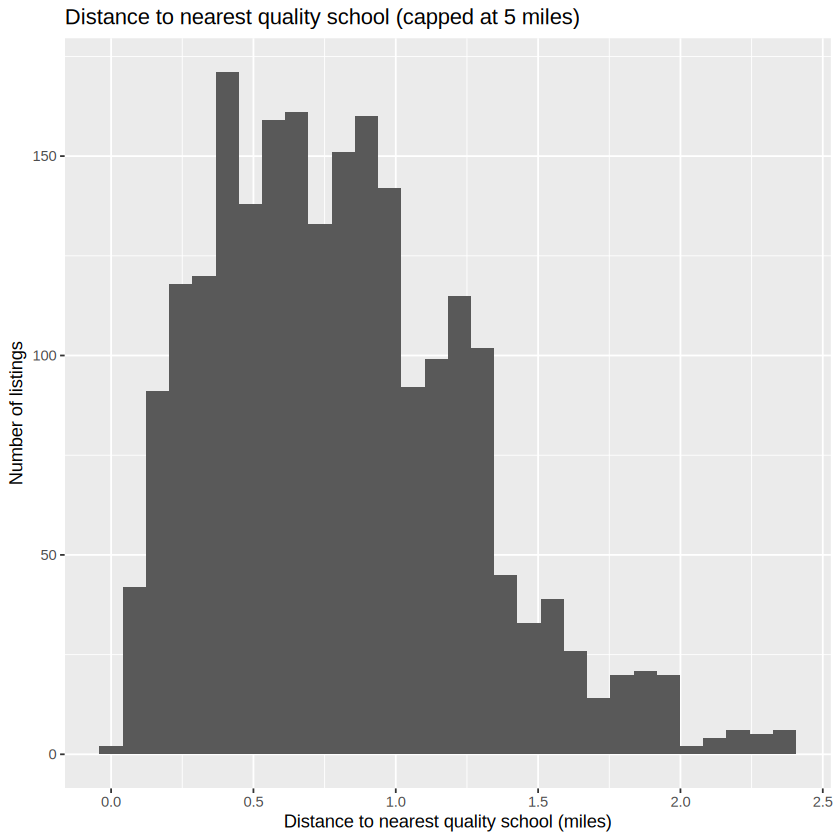

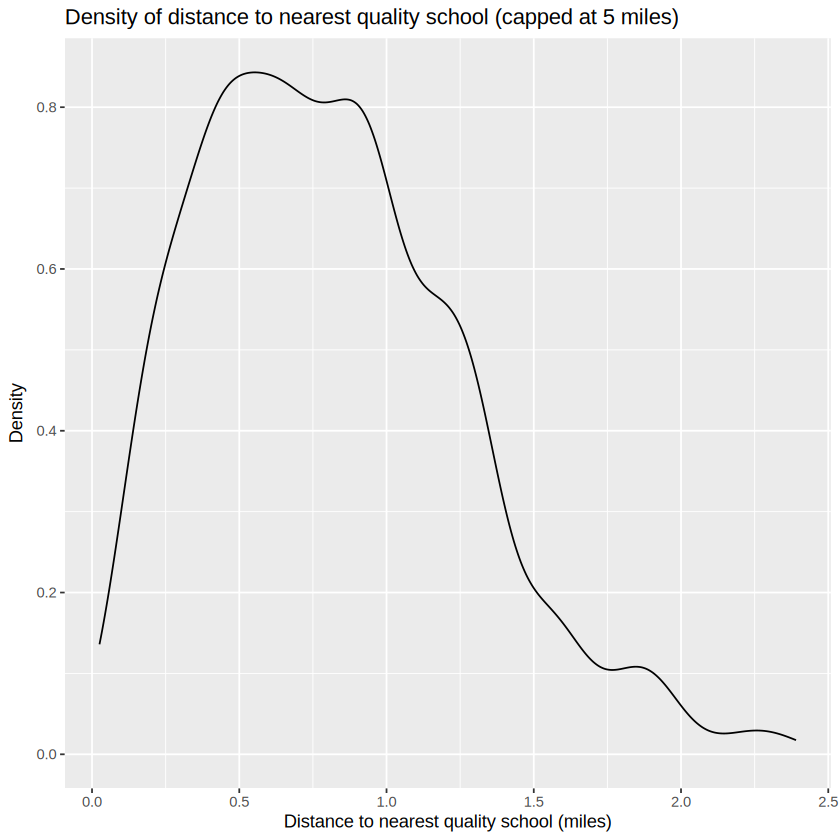

In [31]:
library(dplyr)
library(ggplot2)

# Filter out NAs, and maybe cap at, say, 5 miles to avoid extreme tails
dist_data <- homes_df %>%
  filter(!is.na(distance_to_quality_school_miles)) %>%
  mutate(
    distance_capped = pmin(distance_to_quality_school_miles, 5)
  )

# 1) Histogram
ggplot(dist_data, aes(x = distance_capped)) +
  geom_histogram(bins = 30) +
  labs(
    title = "Distance to nearest quality school (capped at 5 miles)",
    x = "Distance to nearest quality school (miles)",
    y = "Number of listings"
  )

# 2) Density plot
ggplot(dist_data, aes(x = distance_capped)) +
  geom_density() +
  labs(
    title = "Density of distance to nearest quality school (capped at 5 miles)",
    x = "Distance to nearest quality school (miles)",
    y = "Density"
  )


In [32]:
library(dplyr)
library(readr)

homes_df <- homes_df %>%
  mutate(
    price_num = readr::parse_number(as.character(PRICE))
  )

# Quick check
summary(homes_df$price_num)



   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1000  620000  901000 1167915 1405000 8500000 

In [33]:
homes_df %>%
  summarise(
    n_homes                  = n(),
    median_price_all         = median(price_num, na.rm = TRUE),
    median_price_0_5         = median(price_num[within_0_5_mile_quality_school == 1], na.rm = TRUE),
    median_price_not_0_5     = median(price_num[within_0_5_mile_quality_school == 0], na.rm = TRUE),
    median_price_1_mile      = median(price_num[within_1_mile_quality_school == 1], na.rm = TRUE),
    median_price_not_1_mile  = median(price_num[within_1_mile_quality_school == 0], na.rm = TRUE)
  )


n_homes median_price_all median_price_0_5 median_price_not_0_5
1 2237    901000           1105000          850000              
  median_price_1_mile median_price_not_1_mile
1 969500              820000

In [34]:
library(dplyr)

homes_df_dist <- homes_df %>%
  filter(!is.na(distance_to_quality_school_miles), !is.na(price_num)) %>%
  mutate(
    dist_band = cut(
      distance_to_quality_school_miles,
      breaks = c(0, 0.25, 0.5, 1, 2, Inf),
      labels = c("0–0.25 mi", "0.25–0.5 mi", "0.5–1 mi", "1–2 mi", "2+ mi"),
      right = TRUE
    )
  )


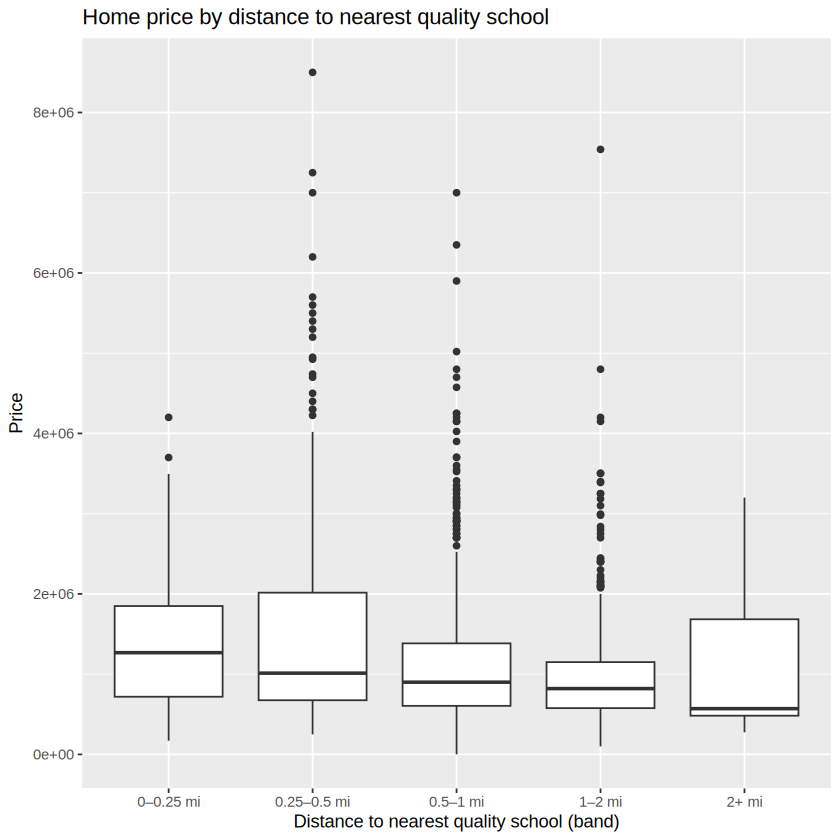

In [35]:
library(ggplot2)

ggplot(homes_df_dist, aes(x = dist_band, y = price_num)) +
  geom_boxplot() +
  labs(
    title = "Home price by distance to nearest quality school",
    x = "Distance to nearest quality school (band)",
    y = "Price"
  )


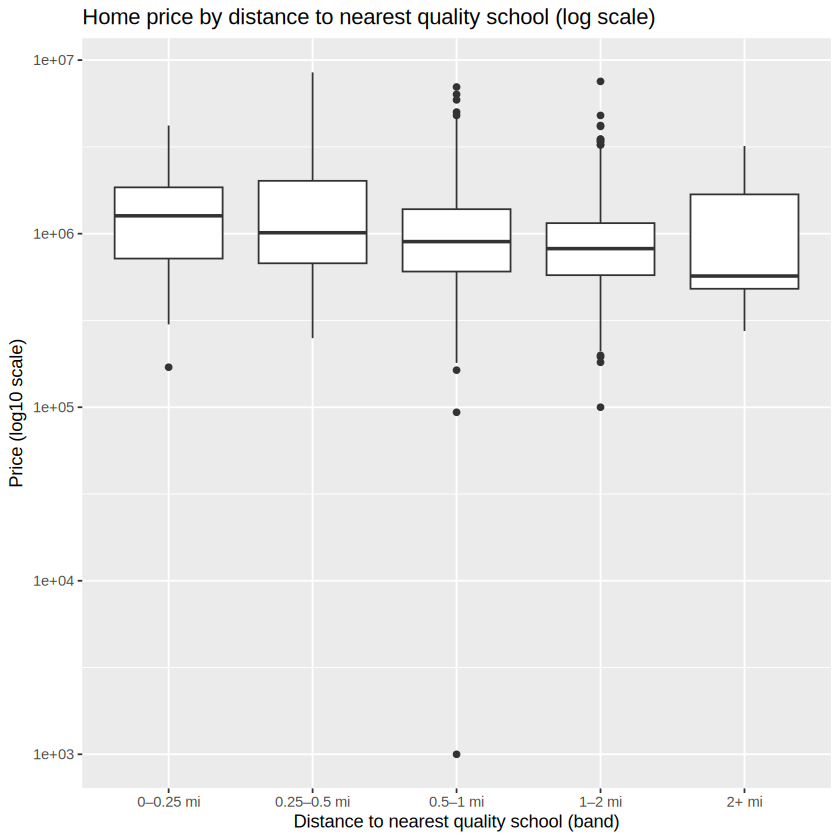

In [36]:
ggplot(homes_df_dist, aes(x = dist_band, y = price_num)) +
  geom_boxplot() +
  scale_y_log10() +
  labs(
    title = "Home price by distance to nearest quality school (log scale)",
    x = "Distance to nearest quality school (band)",
    y = "Price (log10 scale)"
  )


In [37]:
band_summary <- homes_df_dist %>%
  group_by(dist_band) %>%
  summarise(
    n            = n(),
    median_price = median(price_num, na.rm = TRUE),
    mean_price   = mean(price_num, na.rm = TRUE),
    .groups = "drop"
  )

band_summary


dist_band   n   median_price mean_price
1 0–0.25 mi   206 1267500      1383351.7 
2 0.25–0.5 mi 418 1012500      1496732.9 
3 0.5–1 mi    932  900000      1117574.3 
4 1–2 mi      658  820000       967518.1 
5 2+ mi        23  570000      1035452.2

dist_band   n   median_price median_price_k
1 0–0.25 mi   206 1267500      1267.5        
2 0.25–0.5 mi 418 1012500      1012.5        
3 0.5–1 mi    932  900000       900.0        
4 1–2 mi      658  820000       820.0        
5 2+ mi        23  570000       570.0

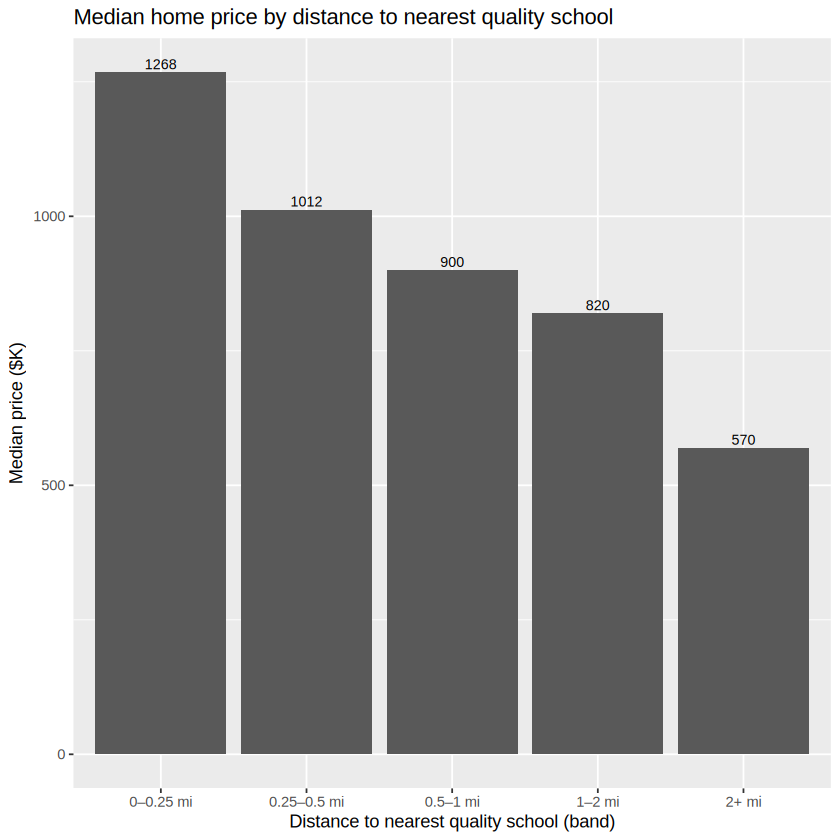

In [38]:
library(dplyr)
library(ggplot2)

# If you already have homes_df_dist from before, you can skip this block
homes_df_dist <- homes_df %>%
  filter(!is.na(distance_to_quality_school_miles), !is.na(price_num)) %>%
  mutate(
    dist_band = cut(
      distance_to_quality_school_miles,
      breaks = c(0, 0.25, 0.5, 1, 2, Inf),
      labels = c("0–0.25 mi", "0.25–0.5 mi", "0.5–1 mi", "1–2 mi", "2+ mi"),
      right = TRUE
    )
  )

band_summary <- homes_df_dist %>%
  group_by(dist_band) %>%
  summarise(
    n            = n(),
    median_price = median(price_num, na.rm = TRUE),
    .groups = "drop"
  ) %>%
  mutate(
    median_price_k = median_price / 1000   # in thousands
  )

band_summary

ggplot(band_summary, aes(x = dist_band, y = median_price_k)) +
  geom_col() +
  geom_text(
    aes(label = round(median_price_k)),
    vjust = -0.3,
    size = 3
  ) +
  labs(
    title = "Median home price by distance to nearest quality school",
    x = "Distance to nearest quality school (band)",
    y = "Median price ($K)"
  )


# Amenities proximity calc



In [39]:
library(tidyverse)

amenities <- tribble(
  ~name,                                   ~category,              ~address,
  # Groceries
  "Whole Foods - Telegraph",               "grocery",              "5110 Telegraph Ave, Oakland, CA 94609",
  "Whole Foods - Lake Merritt",            "grocery",              "230 Bay Pl, Oakland, CA 94612",
  "Trader Joe's - Lakeshore",              "grocery",              "3250 Lakeshore Ave, Oakland, CA 94610",
  "Trader Joe's - Rockridge",              "grocery",              "5727 College Ave, Oakland, CA 94618",
  "Costco - Richmond",                     "grocery",              "4801 Central Ave, Richmond, CA 94804",
  "Costco - San Leandro",                  "grocery",              "1900 Davis St, San Leandro, CA 94577",

  # Major retail/dining clusters
  "Montclair Village",                     "retail_dining",        "1963 Mountain Blvd, Oakland, CA 94611",
  "Rockridge Commercial Strip",            "retail_dining",        "College Ave & Claremont Ave, Oakland, CA 94618",
  "Temescal District",                     "retail_dining",        "4701 Telegraph Ave, Oakland, CA",
  "Grand Ave / Grand Lake District",       "retail_dining",        "3200 Grand Ave, Oakland, CA 94610",
  "Lakeshore District",                    "retail_dining",        "3300 Lakeshore Ave, Oakland, CA 94610",

  # Shopping centers
  "Bayfair Center",                        "shopping_center",      "15555 E 14th St, San Leandro, CA 94578",
  "Bay Street Emeryville",                 "shopping_center",      "5614 Bay St, Emeryville, CA 94608",
  "Target - Alameda",                      "shopping_center",      "2700 5th St, Alameda, CA 94501",

  # Hiking / Oakland hills
  "Redwood Regional - Skyline Gate",       "hiking",               "8490 Skyline Blvd, Oakland, CA 94611",
  "Joaquin Miller Park",                   "hiking",               "3450 Joaquin Miller Rd, Oakland, CA 94602",

  # Waterfronts
  "Jack London Square Waterfront",         "waterfront",           "98 Broadway, Oakland, CA 94607",

  # Employers — CLEAN OFFICE
  "Pixar Animation Studios",               "employer_pixar",       "1200 Park Ave, Emeryville, CA 94608",
  "PG&E HQ",                               "employer_downtown",       "300 Lakeside Dr, Oakland, CA 94612",
  "University of California, Berkeley",    "employer_college",       "2512A Telegraph Ave, Berkeley, CA 94704",
  "TPMG",                                  "employer_downtown",       "1950 Franklin Street, Oakland, CA 94612",

  # Employers — INDUSTRIAL / LOGISTICS / MANUFACTURING
  "Port of Oakland - Seaport",             "employer_industrial",  "530 Water St, Oakland, CA 94607",
  "Oakland Int'l Airport & Cargo (OAK)",   "employer_industrial",  "1 Airport Dr, Oakland, CA 94621",
  "Oakland Global Trade & Logistics Hub",  "employer_industrial",  "2400 W 7th St, Oakland, CA 94607",
  "Tesla Fremont Factory",                 "employer_industrial",  "45500 Fremont Blvd, Fremont, CA 94538"
    

)


In [40]:
install.packages("tidygeocoder")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [41]:
library(tidygeocoder)

amenities_geo <- amenities %>%
  geocode(address, method = "osm", lat = latitude, long = longitude)

amenities_geo


Warning message:
“package ‘tidygeocoder’ was built under R version 4.5.2”
Passing 25 addresses to the Nominatim single address geocoder

Query completed in: 66.4 seconds



name                                 category           
1  Whole Foods - Telegraph              grocery            
2  Whole Foods - Lake Merritt           grocery            
3  Trader Joe's - Lakeshore             grocery            
4  Trader Joe's - Rockridge             grocery            
5  Costco - Richmond                    grocery            
6  Costco - San Leandro                 grocery            
7  Montclair Village                    retail_dining      
8  Rockridge Commercial Strip           retail_dining      
9  Temescal District                    retail_dining      
10 Grand Ave / Grand Lake District      retail_dining      
11 Lakeshore District                   retail_dining      
12 Bayfair Center                       shopping_center    
13 Bay Street Emeryville                shopping_center    
14 Target - Alameda                     shopping_center    
15 Redwood Regional - Skyline Gate      hiking             
16 Joaquin Miller Park                  hiking             
17 Jack London Square Waterfront        waterfront         
18 Pixar Animation Studios              employer_pixar     
19 PG&E HQ                              employer_downtown  
20 University of California, Berkeley   employer_college   
21 TPMG                                 employer_downtown  
22 Port of Oakland - Seaport            employer_industrial
23 Oakland Int'l Airport & Cargo (OAK)  employer_industrial
24 Oakland Global Trade & Logistics Hub employer_industrial
25 Tesla Fremont Factory                employer_industrial
   address                                        latitude longitude
1  5110 Telegraph Ave, Oakland, CA 94609          37.83752 -122.2616
2  230 Bay Pl, Oakland, CA 94612                  37.81309 -122.2607
3  3250 Lakeshore Ave, Oakland, CA 94610          37.80979 -122.2443
4  5727 College Ave, Oakland, CA 94618            37.84554 -122.2526
5  4801 Central Ave, Richmond, CA 94804           37.89884 -122.3202
6  1900 Davis St, San Leandro, CA 94577           37.72081 -122.1819
7  1963 Mountain Blvd, Oakland, CA 94611          37.82801 -122.2105
8  College Ave & Claremont Ave, Oakland, CA 94618 37.84877 -122.2523
9  4701 Telegraph Ave, Oakland, CA                37.83448 -122.2633
10 3200 Grand Ave, Oakland, CA 94610              37.81159 -122.2478
11 3300 Lakeshore Ave, Oakland, CA 94610          37.81050 -122.2440
12 15555 E 14th St, San Leandro, CA 94578         37.70043 -122.1265
13 5614 Bay St, Emeryville, CA 94608              37.83352 -122.2919
14 2700 5th St, Alameda, CA 94501                 37.78898 -122.2807
15 8490 Skyline Blvd, Oakland, CA 94611           37.85334 -122.2143
16 3450 Joaquin Miller Rd, Oakland, CA 94602      37.80950 -122.1861
17 98 Broadway, Oakland, CA 94607                 37.79485 -122.2763
18 1200 Park Ave, Emeryville, CA 94608            37.83267 -122.2837
19 300 Lakeside Dr, Oakland, CA 94612             37.80878 -122.2641
20 2512A Telegraph Ave, Berkeley, CA 94704        37.86952 -122.2594
21 1950 Franklin Street, Oakland, CA 94612        37.80761 -122.2666
22 530 Water St, Oakland, CA 94607                37.79576 -122.2788
23 1 Airport Dr, Oakland, CA 94621                37.71776 -122.2055
24 2400 W 7th St, Oakland, CA 94607               37.80486 -122.2947
25 45500 Fremont Blvd, Fremont, CA 94538          37.49697 -121.9449

In [42]:
library(sf)
library(dplyr)
library(purrr)

# 1) Convert homes_df to sf
homes_sf <- homes_df %>%
  st_as_sf(coords = c("LONGITUDE", "LATITUDE"), crs = 4326, remove = FALSE)

# 2) Convert amenities to sf
amenities_sf <- amenities_geo %>%
  st_as_sf(coords = c("longitude", "latitude"), crs = 4326, remove = FALSE)

# Helper: compute minimum distance (in miles) from each home to any amenity in a category
dist_to_category <- function(category_name) {
  cat_points <- amenities_sf %>% filter(category == category_name)

  # st_distance returns a matrix of distances in meters
  dmat <- st_distance(homes_sf, cat_points)  # homes x amenities

  # Take min distance per home, convert meters to miles
  min_meters <- apply(dmat, 1, min)
  min_miles  <- as.numeric(min_meters) / 1609.34

  tibble(!!paste0("dist_to_", category_name, "_miles") := min_miles)
}

# List of categories to create columns for
cats <- c("grocery", "retail_dining", "shopping_center", "hiking", "waterfront", "employer_pixar", "employer_industrial", "employer_downtown", "employer_college")

# 3) Build a tibble of all distance columns
dist_cols <- map_dfc(cats, dist_to_category)

# 4) Remove any existing distance-to-amenity columns before adding new ones
homes_df_clean <- homes_df %>%
  select(
    -starts_with("dist_to_grocery_miles"),
    -starts_with("dist_to_retail_dining_miles"),
    -starts_with("dist_to_shopping_center_miles"),
    -starts_with("dist_to_hiking_miles"),
    -starts_with("dist_to_waterfront_miles"),
    -starts_with("dist_to_employer_clean_miles"),
    -starts_with("dist_to_employer_industrial_miles")
  )

# 5) Bind newly-created distance columns safely
homes_df_with_amenities <- bind_cols(homes_df_clean, dist_cols)



In [43]:
homes_df <- homes_df_with_amenities
colnames(homes_df)


[1] "SALE TYPE"                                                                                  
 [2] "SOLD DATE"                                                                                  
 [3] "PROPERTY TYPE"                                                                              
 [4] "ADDRESS"                                                                                    
 [5] "CITY"                                                                                       
 [6] "STATE OR PROVINCE"                                                                          
 [7] "ZIP OR POSTAL CODE"                                                                         
 [8] "PRICE"                                                                                      
 [9] "BEDS"                                                                                       
[10] "BATHS"                                                                                      
[11] "LOCATION"                                                                                   
[12] "SQUARE FEET"                                                                                
[13] "LOT SIZE"                                                                                   
[14] "YEAR BUILT"                                                                                 
[15] "DAYS ON MARKET"                                                                             
[16] "$/SQUARE FEET"                                                                              
[17] "HOA/MONTH"                                                                                  
[18] "STATUS"                                                                                     
[19] "NEXT OPEN HOUSE START TIME"                                                                 
[20] "NEXT OPEN HOUSE END TIME"                                                                   
[21] "URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)"
[22] "SOURCE"                                                                                     
[23] "MLS#"                                                                                       
[24] "FAVORITE"                                                                                   
[25] "INTERESTED"                                                                                 
[26] "LATITUDE"                                                                                   
[27] "LONGITUDE"                                                                                  
[28] "distance_to_bart_miles"                                                                     
[29] "within_0_5_miles_bart"                                                                      
[30] "distance_to_quality_school_miles"                                                           
[31] "nearest_quality_school_name"                                                                
[32] "nearest_quality_school_quality_distance"                                                    
[33] "nearest_quality_school_quality_level"                                                       
[34] "within_2_miles_quality_school"                                                              
[35] "within_0_5_mile_quality_school"                                                             
[36] "within_1_mile_quality_school"                                                               
[37] "price_num"                                                                                  
[38] "dist_to_grocery_miles"                                                                      
[39] "dist_to_retail_dining_miles"                                                                
[40] "dist_to_shopping_center_miles"                                                              
[41] "dist_to_hiking_miles"              

In [44]:
set.seed(123)  # for reproducibility, optional

homes_df %>%
  dplyr::slice_sample(n = 10) %>%              # grab 10 random listings
  dplyr::select(
    ADDRESS, CITY, PRICE,                      # core listing info (adjust to your cols)
    LATITUDE, LONGITUDE,
    dplyr::starts_with("dist_to_")            # all the new amenity distance columns
  )


ADDRESS                     CITY       PRICE   LATITUDE LONGITUDE
1  402 Hiller Dr               Oakland     925000 37.85368 -122.2262
2  1116 16th St                Oakland     876000 37.81114 -122.2850
3  2033 Harrington Ave         Oakland     195000 37.78199 -122.2155
4  6258 Boulder Ln #4801       Oakland     795000 37.77953 -122.1646
5  1009 Winsor Ave             Piedmont   2100000 37.81640 -122.2373
6  4614 Rockingham Ct          Oakland    4800000 37.78582 -122.1643
7  868 44th St                 Emeryville 1175000 37.83381 -122.2722
8  9057 Skyline Blvd           Oakland    2400000 37.82622 -122.1891
9  6907 Chambers Dr            Oakland     965000 37.83621 -122.1990
10 252 International Blvd #103 Oakland     480000 37.79748 -122.2555
   dist_to_grocery_miles dist_to_retail_dining_miles
1  1.5454525             1.4628948                  
2  1.3342641             2.0011588                  
3  2.4810784             2.5102953                  
4  4.1660273             4.1855013                  
5  0.5950197             0.5484011                  
6  4.5929097             3.8561336                  
7  0.6339907             0.4862456                  
8  3.2174252             1.1764824                  
9  2.9936298             0.8455159                  
10 1.0495404             1.0609451                  
   dist_to_shopping_center_miles dist_to_hiking_miles dist_to_waterfront_miles
1  3.842013                      0.6494815            4.897004                
2  1.549991                      4.8360853            1.223272                
3  3.592797                      2.4857342            3.435385                
4  5.846700                      2.3821367            6.190523                
5  3.034921                      2.8310480            2.598023                
6  6.249684                      2.0245945            6.145203                
7  1.072749                      3.4334778            2.701295                
8  5.623285                      1.1667697            5.228566                
9  5.068166                      1.4480853            5.092782                
10 1.494587                      3.8776022            1.146993                
   dist_to_employer_pixar_miles dist_to_employer_industrial_miles
1  3.4552701                    4.9248384                        
2  1.4891921                    0.6830598                        
3  5.1108052                    3.5861265                        
4  7.4679105                    4.8174156                        
5  2.7718602                    2.6793241                        
6  7.2768482                    5.2120908                        
7  0.6323802                    2.3474068                        
8  5.1811715                    5.3304069                        
9  4.6261225                    5.1743860                        
10 2.8764668                    1.2772178                        
   dist_to_employer_downtown_miles dist_to_employer_college_miles
1  3.7262586                       2.114833                      
2  1.0337291                       4.268819                      
3  3.2331619                       6.504602                      
4  5.7953815                       8.089534                      
5  1.5538472                       3.863492                      
6  5.6721495                       7.770205                      
7  1.7859899                       2.563626                      
8  4.2645979                       4.863836                      
9  4.0227361                       4.017701                      
10 0.9085552                       4.981375

# HOLC Zone Calc


In [45]:
library(sf)
library(dplyr)

# --- 0. Make sure both layers use the same CRS (WGS84 / 4326) ---

# If oakland_sf_valid is already 4326, this is a no-op but safe:
oakland_sf_valid <- st_transform(oakland_sf_valid, 4326)

# Homes as sf points (you already used this pattern before)
homes_sf <- homes_df %>%
  st_as_sf(coords = c("LONGITUDE", "LATITUDE"),
           crs = 4326,
           remove = FALSE)

# --- 1. Keep only the HOLC grade from the polygons ---

oakland_zones <- oakland_sf_valid %>%
  select(grade)  # 'grade' is the A/B/C/D column

# --- 2. Spatial join: assign each listing the HOLC grade of the polygon it falls in ---

homes_with_holc_sf <- st_join(
  homes_sf,
  oakland_zones,
  join = st_within,  # point-in-polygon
  left = TRUE        # keep all homes; grade will be NA if outside any zone
)

# --- 3. Map grade -> color and drop geometry back to a regular data frame ---

holc_colors <- c("A" = "green", "B" = "blue", "C" = "yellow", "D" = "red")

homes_df <- homes_with_holc_sf %>%
  st_drop_geometry() %>%
  mutate(
    holc_grade = grade,  # rename for clarity
    holc_grade = factor(holc_grade, levels = c("A", "B", "C", "D")),
    holc_color = holc_colors[as.character(holc_grade)]
  )


In [46]:
# How many listings in each HOLC grade?
homes_df %>% count(holc_grade)

# Peek at random listings with their HOLC tag + distances
set.seed(123)
homes_df %>%
  slice_sample(n = 5) %>%
  select(ADDRESS, CITY, holc_grade, holc_color, starts_with("dist_to_"))


holc_grade n  
1 A          275
2 B          452
3 C          669
4 D          402
5 NA         439

ADDRESS               CITY     holc_grade holc_color dist_to_grocery_miles
1 402 Hiller Dr         Oakland  NA         NA         1.5454525            
2 1116 16th St          Oakland  D          red        1.3342641            
3 2033 Harrington Ave   Oakland  C          yellow     2.4810784            
4 6258 Boulder Ln #4801 Oakland  NA         NA         4.1660273            
5 1009 Winsor Ave       Piedmont B          blue       0.5950197            
  dist_to_retail_dining_miles dist_to_shopping_center_miles
1 1.4628948                   3.842013                     
2 2.0011588                   1.549991                     
3 2.5102953                   3.592797                     
4 4.1855013                   5.846700                     
5 0.5484011                   3.034921                     
  dist_to_hiking_miles dist_to_waterfront_miles dist_to_employer_pixar_miles
1 0.6494815            4.897004                 3.455270                    
2 4.8360853            1.223272                 1.489192                    
3 2.4857342            3.435385                 5.110805                    
4 2.3821367            6.190523                 7.467911                    
5 2.8310480            2.598023                 2.771860                    
  dist_to_employer_industrial_miles dist_to_employer_downtown_miles
1 4.9248384                         3.726259                       
2 0.6830598                         1.033729                       
3 3.5861265                         3.233162                       
4 4.8174156                         5.795381                       
5 2.6793241                         1.553847                       
  dist_to_employer_college_miles
1 2.114833                      
2 4.268819                      
3 6.504602                      
4 8.089534                      
5 3.863492

In [47]:
library(dplyr)

homes_df <- homes_df %>%
  mutate(
    # Grade-based dummies
    is_HOLC_A = if_else(holc_grade == "A", 1L, 0L, missing = 0L),
    is_HOLC_B = if_else(holc_grade == "B", 1L, 0L, missing = 0L),
    is_HOLC_C = if_else(holc_grade == "C", 1L, 0L, missing = 0L),
    is_HOLC_D = if_else(holc_grade == "D", 1L, 0L, missing = 0L),

    # Color-based dummy for “redlined” (HOLC D)
    is_HOLC_red = if_else(holc_color == "red", 1L, 0L, missing = 0L)
  )


In [48]:
homes_df %>%
  count(holc_grade, is_HOLC_red)


holc_grade is_HOLC_red n  
1 A          0           275
2 B          0           452
3 C          0           669
4 D          1           402
5 NA         0           439

# Sold Year Fixed Effect


In [49]:
library(dplyr)
library(lubridate)

homes_df <- homes_df %>%
  mutate(
    sale_date = mdy(`SOLD DATE`),      # parse "SOLD DATE" column
    sale_year = year(sale_date)        # extract year
  )


In [50]:
homes_df <- homes_df %>%
  mutate(
    sale_year = factor(sale_year)
  )


In [51]:
table(homes_df$sale_year)



2020 2021 2022 2023 2024 2025 
  89  636  400  265  256  240 

In [52]:
library(dplyr)

homes_df <- homes_df %>%
  mutate(
    # 1) Clean year built into numeric
    year_built = as.numeric(`YEAR BUILT`),

    # 2) Make sure sale_year is numeric (not factor) for the calc
    sale_year_num = as.numeric(as.character(sale_year)),

    # 3) Age of house at time of sale
    age_at_sale = sale_year_num - year_built
  )


In [53]:
homes_df %>%
  select(`YEAR BUILT`, year_built, sale_year, sale_year_num, age_at_sale) %>%
  head()


YEAR BUILT year_built sale_year sale_year_num age_at_sale
1 1928       1928       2023      2023          95         
2 1955       1955       2022      2022          67         
3 1925       1925       NA          NA          NA         
4 1996       1996       NA          NA          NA         
5 1928       1928       NA          NA          NA         
6 1951       1951       2022      2022          71

# LASSO

In [54]:
library(dplyr)
library(purrr)

# Quick glance
glimpse(homes_df)


Rows: 2,237
Columns: 59
$ `SALE TYPE`                                                                                   <chr> …
$ `SOLD DATE`                                                                                   <chr> …
$ `PROPERTY TYPE`                                                                               <chr> …
$ ADDRESS                                                                                       <chr> …
$ CITY                                                                                          <chr> …
$ `STATE OR PROVINCE`                                                                           <chr> …
$ `ZIP OR POSTAL CODE`                                                                          <dbl> …
$ PRICE                                                                                         <dbl> …
$ BEDS                                                                                          <dbl> …
$ BATHS                                 

In [55]:
library(dplyr)
library(glmnet)

model_df <- homes_df %>%
  select(
    PRICE,
    BEDS,
    BATHS,
    `SQUARE FEET`,
    age_at_sale,
    distance_to_bart_miles,
    within_0_5_miles_bart,
    distance_to_quality_school_miles,
    within_0_5_mile_quality_school,
    dist_to_grocery_miles,
    dist_to_retail_dining_miles,
    dist_to_shopping_center_miles,
    dist_to_hiking_miles,
    dist_to_waterfront_miles,
    dist_to_employer_industrial_miles,
    is_HOLC_A,
    is_HOLC_B,
    is_HOLC_D,
    sale_year
    # (note: not including is_HOLC_red to avoid redundancy with is_HOLC_D)
  ) %>%
  tidyr::drop_na() %>%          # drop rows with any missing values in these cols
  mutate(
    log_price = log(PRICE),
    sale_year = factor(sale_year)   # make sure year is a factor for FE
  )


Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


Loaded glmnet 4.1-10



In [56]:
# Model matrix: glmnet wants a numeric matrix for X
x <- model.matrix(
  log_price ~
    BEDS +
    BATHS + 
    `SQUARE FEET` +
    age_at_sale +
    within_0_5_miles_bart +
    distance_to_quality_school_miles + 
    within_0_5_mile_quality_school +
    dist_to_grocery_miles +
    dist_to_retail_dining_miles +
    dist_to_shopping_center_miles +
    dist_to_waterfront_miles + 
    dist_to_employer_industrial_miles +
    is_HOLC_A + is_HOLC_B + is_HOLC_D +
    sale_year,     # year fixed effects via dummies
  data = model_df
)

# Drop intercept column (first col)
x <- x[, -1]

# Outcome
y <- model_df$log_price


In [57]:
set.seed(123)

lasso_cv <- cv.glmnet(
  x, y,
  alpha = 1,         # LASSO
  nfolds = 10        # CV folds
)

# Best lambda (min CV error)
lasso_cv$lambda.min

# Slightly more regularized (1-SE rule)
lasso_cv$lambda.1se


[1] 0.0004395866

[1] 0.07332746

In [58]:
coef_min <- coef(lasso_cv, s = "lambda.min")
coef_min


21 x 1 sparse Matrix of class "dgCMatrix"
                                     lambda.min
(Intercept)                       12.8186717650
BEDS                               0.0331825834
BATHS                              0.0628556399
`SQUARE FEET`                      0.0002949457
age_at_sale                        0.0005347498
within_0_5_miles_bart              0.0494358395
distance_to_quality_school_miles   0.0418187269
within_0_5_mile_quality_school     0.1065252785
dist_to_grocery_miles             -0.0427898875
dist_to_retail_dining_miles       -0.0495848502
dist_to_shopping_center_miles     -0.0696538717
dist_to_waterfront_miles           0.0029168625
dist_to_employer_industrial_miles  0.1369337531
is_HOLC_A                          0.1085917702
is_HOLC_B                          0.1457679204
is_HOLC_D                         -0.0691852448
sale_year2021                      0.0812467510
sale_year2022                      0.0948699170
sale_year2023                      0.037178861

In [59]:
library(tibble)

coef_tbl <- coef_min %>%
  as.matrix() %>%
  as.data.frame() %>%
  rownames_to_column("variable") %>%
  rename(coefficient = 2) %>%
  as_tibble()

# Non-zero coefficients only
coef_tbl %>%
  filter(coefficient != 0)


variable                          coefficient  
1  (Intercept)                       12.8186717650
2  BEDS                               0.0331825834
3  BATHS                              0.0628556399
4  `SQUARE FEET`                      0.0002949457
5  age_at_sale                        0.0005347498
6  within_0_5_miles_bart              0.0494358395
7  distance_to_quality_school_miles   0.0418187269
8  within_0_5_mile_quality_school     0.1065252785
9  dist_to_grocery_miles             -0.0427898875
10 dist_to_retail_dining_miles       -0.0495848502
11 dist_to_shopping_center_miles     -0.0696538717
12 dist_to_waterfront_miles           0.0029168625
13 dist_to_employer_industrial_miles  0.1369337531
14 is_HOLC_A                          0.1085917702
15 is_HOLC_B                          0.1457679204
16 is_HOLC_D                         -0.0691852448
17 sale_year2021                      0.0812467510
18 sale_year2022                      0.0948699170
19 sale_year2023                      0.0371788614
20 sale_year2024                      0.0336541914
21 sale_year2025                     -0.0617159667

In [60]:
library(tibble)
library(dplyr)

# Coefficients at lambda.min
coef_min <- coef(lasso_cv, s = "lambda.min")

coef_tbl <- coef_min %>%
  as.matrix() %>%
  as.data.frame() %>%
  rownames_to_column("variable") %>%
  rename(coefficient = 2) %>%
  as_tibble()

# Separate intercept
intercept <- coef_tbl %>%
  filter(variable == "(Intercept)")

# Variables kept (non-zero, excluding intercept)
vars_kept <- coef_tbl %>%
  filter(variable != "(Intercept)",
         coefficient != 0)

# Variables removed (exactly zero)
vars_removed <- coef_tbl %>%
  filter(variable != "(Intercept)",
         coefficient == 0)

# View them
vars_kept
vars_removed
intercept


variable                          coefficient  
1  BEDS                               0.0331825834
2  BATHS                              0.0628556399
3  `SQUARE FEET`                      0.0002949457
4  age_at_sale                        0.0005347498
5  within_0_5_miles_bart              0.0494358395
6  distance_to_quality_school_miles   0.0418187269
7  within_0_5_mile_quality_school     0.1065252785
8  dist_to_grocery_miles             -0.0427898875
9  dist_to_retail_dining_miles       -0.0495848502
10 dist_to_shopping_center_miles     -0.0696538717
11 dist_to_waterfront_miles           0.0029168625
12 dist_to_employer_industrial_miles  0.1369337531
13 is_HOLC_A                          0.1085917702
14 is_HOLC_B                          0.1457679204
15 is_HOLC_D                         -0.0691852448
16 sale_year2021                      0.0812467510
17 sale_year2022                      0.0948699170
18 sale_year2023                      0.0371788614
19 sale_year2024                      0.0336541914
20 sale_year2025                     -0.0617159667

variable coefficient

variable    coefficient
1 (Intercept) 12.81867

In [61]:
library(dplyr)
library(tibble)
library(stringr)

# Coefficients from LASSO at lambda.min
coef_min <- coef(lasso_cv, s = "lambda.min")

coef_tbl <- coef_min %>%
  as.matrix() %>%
  as.data.frame() %>%
  rownames_to_column("variable") %>%
  rename(coefficient = 2) %>%
  as_tibble()

# Remove intercept, add absolute value, sort by |coef|
coef_sorted <- coef_tbl %>%
  filter(variable != "(Intercept)") %>%
  mutate(abs_coef = abs(coefficient)) %>%
  arrange(desc(abs_coef))

# Look at the top 10 to sanity check
coef_sorted %>% head(22)


variable                          coefficient   abs_coef    
1  is_HOLC_B                          0.1457679204 0.1457679204
2  dist_to_employer_industrial_miles  0.1369337531 0.1369337531
3  is_HOLC_A                          0.1085917702 0.1085917702
4  within_0_5_mile_quality_school     0.1065252785 0.1065252785
5  sale_year2022                      0.0948699170 0.0948699170
6  sale_year2021                      0.0812467510 0.0812467510
7  dist_to_shopping_center_miles     -0.0696538717 0.0696538717
8  is_HOLC_D                         -0.0691852448 0.0691852448
9  BATHS                              0.0628556399 0.0628556399
10 sale_year2025                     -0.0617159667 0.0617159667
11 dist_to_retail_dining_miles       -0.0495848502 0.0495848502
12 within_0_5_miles_bart              0.0494358395 0.0494358395
13 dist_to_grocery_miles             -0.0427898875 0.0427898875
14 distance_to_quality_school_miles   0.0418187269 0.0418187269
15 sale_year2023                      0.0371788614 0.0371788614
16 sale_year2024                      0.0336541914 0.0336541914
17 BEDS                               0.0331825834 0.0331825834
18 dist_to_waterfront_miles           0.0029168625 0.0029168625
19 age_at_sale                        0.0005347498 0.0005347498
20 `SQUARE FEET`                      0.0002949457 0.0002949457

In [62]:
model_ols <- lm(
  log(PRICE) ~ BATHS + BEDS + is_HOLC_A + is_HOLC_B + is_HOLC_D + `SQUARE FEET` +
    sale_year,
  data = homes_df
)

summary(model_ols)



Call:
lm(formula = log(PRICE) ~ BATHS + BEDS + is_HOLC_A + is_HOLC_B + 
    is_HOLC_D + `SQUARE FEET` + sale_year, data = homes_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.4577 -0.2057  0.0028  0.2278  1.0222 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    1.289e+01  4.447e-02 289.774  < 2e-16 ***
BATHS          6.948e-02  1.470e-02   4.727 2.45e-06 ***
BEDS           2.085e-02  1.017e-02   2.049   0.0406 *  
is_HOLC_A      2.811e-01  2.850e-02   9.861  < 2e-16 ***
is_HOLC_B      2.260e-01  2.251e-02  10.038  < 2e-16 ***
is_HOLC_D     -1.136e-01  2.364e-02  -4.807 1.66e-06 ***
`SQUARE FEET`  3.300e-04  1.727e-05  19.110  < 2e-16 ***
sale_year2021  7.528e-02  4.153e-02   1.813   0.0700 .  
sale_year2022  9.144e-02  4.298e-02   2.128   0.0335 *  
sale_year2023  3.577e-02  4.496e-02   0.796   0.4264    
sale_year2024  3.369e-02  4.518e-02   0.746   0.4559    
sale_year2025 -3.943e-02  4.552e-02  -0.866   0.3865    
---
Signif. codes

# Takeaway Look for D-level / historically redlined areas that have a Pixar-level employer, waterfront/downtown proximity, and active infill development — places where the “big forces” are strong enough to bend the usual D discount at the zip level

94607 and 94608 both have a pretty high share of HOLC D,

but their price difference vs 94609 is basically ~0% (or even slightly positive for 94608),

whereas other high-D zips (94601, 94603, 94621) are −30–45% cheaper.

So the story is roughly:

94607 = West Oakland / Jack London

Lots of historically D-graded areas.

But also super strong location advantages: right next to downtown, BART, the waterfront, new lofts/condos, SF access, etc.

Those forces have pushed prices up enough to offset the D penalty at the zip level.

94608 = North Oakland / Emeryville

Historically redlined pockets, but: Pixar, Bay Street, tons of new development, very SF-adjacent.

Again, big gentrification + job center + retail story that counteracts the “redlined zip = cheap” pattern.

In [63]:
library(tidyverse)

# See structure + column types
glimpse(homes_df)

# See the column names explicitly
colnames(homes_df)

# Random sample of 15 *full* rows (all columns)
set.seed(123)  # so you can reproduce the same sample if needed

homes_df %>%
  slice_sample(n = 15)


Rows: 2,237
Columns: 59
$ `SALE TYPE`                                                                                   <chr> …
$ `SOLD DATE`                                                                                   <chr> …
$ `PROPERTY TYPE`                                                                               <chr> …
$ ADDRESS                                                                                       <chr> …
$ CITY                                                                                          <chr> …
$ `STATE OR PROVINCE`                                                                           <chr> …
$ `ZIP OR POSTAL CODE`                                                                          <dbl> …
$ PRICE                                                                                         <dbl> …
$ BEDS                                                                                          <dbl> …
$ BATHS                                 

[1] "SALE TYPE"                                                                                  
 [2] "SOLD DATE"                                                                                  
 [3] "PROPERTY TYPE"                                                                              
 [4] "ADDRESS"                                                                                    
 [5] "CITY"                                                                                       
 [6] "STATE OR PROVINCE"                                                                          
 [7] "ZIP OR POSTAL CODE"                                                                         
 [8] "PRICE"                                                                                      
 [9] "BEDS"                                                                                       
[10] "BATHS"                                                                                      
[11] "LOCATION"                                                                                   
[12] "SQUARE FEET"                                                                                
[13] "LOT SIZE"                                                                                   
[14] "YEAR BUILT"                                                                                 
[15] "DAYS ON MARKET"                                                                             
[16] "$/SQUARE FEET"                                                                              
[17] "HOA/MONTH"                                                                                  
[18] "STATUS"                                                                                     
[19] "NEXT OPEN HOUSE START TIME"                                                                 
[20] "NEXT OPEN HOUSE END TIME"                                                                   
[21] "URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)"
[22] "SOURCE"                                                                                     
[23] "MLS#"                                                                                       
[24] "FAVORITE"                                                                                   
[25] "INTERESTED"                                                                                 
[26] "LATITUDE"                                                                                   
[27] "LONGITUDE"                                                                                  
[28] "distance_to_bart_miles"                                                                     
[29] "within_0_5_miles_bart"                                                                      
[30] "distance_to_quality_school_miles"                                                           
[31] "nearest_quality_school_name"                                                                
[32] "nearest_quality_school_quality_distance"                                                    
[33] "nearest_quality_school_quality_level"                                                       
[34] "within_2_miles_quality_school"                                                              
[35] "within_0_5_mile_quality_school"                                                             
[36] "within_1_mile_quality_school"                                                               
[37] "price_num"                                                                                  
[38] "dist_to_grocery_miles"                                                                      
[39] "dist_to_retail_dining_miles"                                                                
[40] "dist_to_shopping_center_miles"                                                              
[41] "dist_to_hiking_miles"              

SALE TYPE SOLD DATE         PROPERTY TYPE            
1  PAST SALE August-26-2025    Townhouse                
2  PAST SALE September-3-2024  Single Family Residential
3  PAST SALE NA                Single Family Residential
4  PAST SALE August-20-2021    Condo/Co-op              
5  PAST SALE November-10-2022  Single Family Residential
6  PAST SALE October-18-2021   Single Family Residential
7  PAST SALE September-13-2024 Single Family Residential
8  PAST SALE July-9-2021       Single Family Residential
9  PAST SALE May-11-2023       Single Family Residential
10 PAST SALE November-13-2022  Condo/Co-op              
11 PAST SALE April-21-2021     Single Family Residential
12 PAST SALE August-8-2023     Single Family Residential
13 PAST SALE March-1-2024      Single Family Residential
14 PAST SALE NA                Single Family Residential
15 PAST SALE July-6-2021       Single Family Residential
   ADDRESS                     CITY       STATE OR PROVINCE ZIP OR POSTAL CODE
1  402 Hiller Dr               Oakland    CA                94618             
2  1116 16th St                Oakland    CA                94607             
3  2033 Harrington Ave         Oakland    CA                94601             
4  6258 Boulder Ln #4801       Oakland    CA                94605             
5  1009 Winsor Ave             Piedmont   CA                94610             
6  4614 Rockingham Ct          Oakland    CA                94619             
7  868 44th St                 Emeryville CA                94608             
8  9057 Skyline Blvd           Oakland    CA                94611             
9  6907 Chambers Dr            Oakland    CA                94611             
10 252 International Blvd #103 Oakland    CA                94606             
11 835 Grosvenor Pl            Oakland    CA                94610             
12 3996 Oak Hill Rd            Oakland    CA                94605             
13 15 Eucalyptus Rd            Berkeley   CA                94705             
14 3809 Laurel Ave             Oakland    CA                94602             
15 5651 Colbourn Pl            Oakland    CA                94619             
   PRICE   BEDS BATHS ⋯ is_HOLC_A is_HOLC_B is_HOLC_C is_HOLC_D is_HOLC_red
1   925000 3    2.5   ⋯ 0         0         0         0         0          
2   876000 3    2.0   ⋯ 0         0         0         1         1          
3   195000 2    1.0   ⋯ 0         0         1         0         0          
4   795000 3    2.5   ⋯ 0         0         0         0         0          
5  2100000 4    2.5   ⋯ 0         1         0         0         0          
6  4800000 7    8.5   ⋯ 0         0         0         0         0          
7  1175000 5    3.5   ⋯ 0         0         0         1         1          
8  2400000 4    3.0   ⋯ 1         0         0         0         0          
9   965000 3    2.0   ⋯ 1         0         0         0         0          
10  480000 3    2.5   ⋯ 0         0         0         0         0          
11 2075000 4    1.5   ⋯ 0         1         0         0         0          
12 1200000 4    3.0   ⋯ 0         1         0         0         0          
13 4200000 4    3.5   ⋯ 1         0         0         0         0          
14  943000 2    1.0   ⋯ 0         1         0         0         0          
15 2150000 4    3.5   ⋯ 0         0         0         0         0          
   sale_date  sale_year year_built sale_year_num age_at_sale
1  2025-08-26 2025      1994       2025           31        
2  2024-09-03 2024      1980       2024           44        
3  <NA>       NA        1922         NA           NA        
4  2021-08-20 2021      2010       2021           11        
5  2022-11-10 2022      1919       2022          103        
6  2021-10-18 2021      2005       2021           16        
7  2024-09-13 2024      1914       2024          110        
8  2021-07-09 2021      1950       2021           71        
9  2023-05-11 2023      1955       2023           68        
1

In [64]:
set.seed(123)  # so your sample is reproducible

homes_df %>%
  slice_sample(n = 15) %>%
  select(
    distance_to_bart_miles,
    within_0_5_miles_bart,
    distance_to_quality_school_miles,
    nearest_quality_school_name,
    nearest_quality_school_quality_distance,
    nearest_quality_school_quality_level,
    within_2_miles_quality_school,
    within_0_5_mile_quality_school,
    within_1_mile_quality_school,
    price_num,
    dist_to_grocery_miles,
    dist_to_retail_dining_miles,
    dist_to_shopping_center_miles,
    dist_to_hiking_miles,
    dist_to_waterfront_miles,
    dist_to_employer_industrial_miles
  )


distance_to_bart_miles within_0_5_miles_bart
1  1.5016933              0                    
2  0.7016178              0                    
3  0.6822649              0                    
4  2.5097184              0                    
5  1.7980513              0                    
6  2.8439703              0                    
7  0.4304829              1                    
8  3.6191285              0                    
9  2.9128161              0                    
10 0.5296054              0                    
11 1.9646994              0                    
12 2.7588876              0                    
13 0.5799716              0                    
14 2.0177888              0                    
15 3.4550681              0                    
   distance_to_quality_school_miles nearest_quality_school_name          
1  0.9348404                        Chabot Elementary                    
2  0.5112752                        Yu Ming Charter                      
3  1.3634555                        Downtown Charter Academy             
4  1.2108160                        Oakland Unity High                   
5  0.6422999                        Crocker Highlands Elementary         
6  1.4272076                        Oakland Unity High                   
7  1.2106267                        Yu Ming Charter                      
8  0.8712733                        Joaquin Miller Elementary            
9  0.6811770                        Thornhill Elementary                 
10 0.6598578                        Lincoln Elementary                   
11 0.2237329                        Edna Brewer Middle                   
12 0.9749883                        Francophone Charter School Of Oakland
13 0.2244046                        Chabot Elementary                    
14 0.6900887                        Sequoia Elementary                   
15 1.8675804                        Redwood Heights Elementary           
   nearest_quality_school_quality_distance nearest_quality_school_quality_level
1  40.90                                   4                                   
2  91.65                                   5                                   
3  51.05                                   5                                   
4   0.70                                   4                                   
5  48.25                                   5                                   
6   0.70                                   4                                   
7  91.65                                   5                                   
8   2.50                                   4                                   
9  36.70                                   4                                   
10 27.60                                   4                                   
11 -3.85                                   4                                   
12 10.10                                   4                                   
13 40.90                                   4                                   
14 27.75                                   4                                   
15 41.00                                   5                                   
   within_2_miles_quality_school within_0_5_mile_quality_school
1  1                             0                             
2  1                             0                             
3  1                             0                             
4  1                             0                             
5  1                             0                             
6  1                             0                             
7  1                             0                             
8  1                             0                             
9  1                             0                             
10 1                             0                             
11 1                             1                             
12 

In [65]:
library(dplyr)
library(readr)

homes_extended_df <- homes_df %>%
  # add a clean zip_code column for modeling (character version of ZIP OR POSTAL CODE)
  mutate(
    zip_code = as.character(`ZIP OR POSTAL CODE`)
  ) %>%
  # keep ONLY the columns you listed, plus zip_code at the end
  select(
    `SALE TYPE`,
    `SOLD DATE`,
    `PROPERTY TYPE`,
    ADDRESS,
    CITY,
    `STATE OR PROVINCE`,
    `ZIP OR POSTAL CODE`,
    PRICE,
    BEDS,
    BATHS,
    LOCATION,
    `SQUARE FEET`,
    `LOT SIZE`,
    `YEAR BUILT`,
    `DAYS ON MARKET`,
    `$/SQUARE FEET`,
    `HOA/MONTH`,
    STATUS,
    `NEXT OPEN HOUSE START TIME`,
    `NEXT OPEN HOUSE END TIME`,
    `URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)`,
    SOURCE,
    `MLS#`,
    FAVORITE,
    INTERESTED,
    LATITUDE,
    LONGITUDE,
    distance_to_bart_miles,
    within_0_5_miles_bart,
    distance_to_quality_school_miles,
    nearest_quality_school_name,
    nearest_quality_school_quality_distance,
    nearest_quality_school_quality_level,
    within_2_miles_quality_school,
    within_0_5_mile_quality_school,
    within_1_mile_quality_school,
    price_num,
    grade,
    holc_grade,
    holc_color,
    is_HOLC_A,
    is_HOLC_B,
    is_HOLC_C,
    is_HOLC_D,
    is_HOLC_red,
    sale_date,
    sale_year,
    year_built,
    sale_year_num,
    age_at_sale,
    dist_to_grocery_miles,
    dist_to_retail_dining_miles,
    dist_to_shopping_center_miles,
    dist_to_hiking_miles,
    dist_to_waterfront_miles,
    dist_to_employer_industrial_miles,
    dist_to_employer_pixar_miles,
    dist_to_employer_downtown_miles,
    dist_to_employer_college_miles,
    zip_code   # 👈 added for modeling convenience
  )

# quick sanity check
glimpse(homes_extended_df)
slice_sample(homes_extended_df, n = 5)


Rows: 2,237
Columns: 60
$ `SALE TYPE`                                                                                   <chr> …
$ `SOLD DATE`                                                                                   <chr> …
$ `PROPERTY TYPE`                                                                               <chr> …
$ ADDRESS                                                                                       <chr> …
$ CITY                                                                                          <chr> …
$ `STATE OR PROVINCE`                                                                           <chr> …
$ `ZIP OR POSTAL CODE`                                                                          <dbl> …
$ PRICE                                                                                         <dbl> …
$ BEDS                                                                                          <dbl> …
$ BATHS                                 

SALE TYPE SOLD DATE        PROPERTY TYPE            
1 PAST SALE November-18-2024 Townhouse                
2 PAST SALE April-18-2024    Single Family Residential
3 PAST SALE August-20-2021   Condo/Co-op              
4 PAST SALE February-28-2023 Condo/Co-op              
5 PAST SALE NA               Single Family Residential
  ADDRESS                    CITY    STATE OR PROVINCE ZIP OR POSTAL CODE
1 12 Starview Dr             Oakland CA                94618             
2 1024 7th Ave               Oakland CA                94606             
3 801 Franklin St #1417      Oakland CA                94607             
4 9873 Macarthur Blvd Unit F Oakland CA                94605             
5 1420 E 23rd St             Oakland CA                94606             
  PRICE   BEDS BATHS ⋯ dist_to_grocery_miles dist_to_retail_dining_miles
1 1600000 3    3.0   ⋯ 1.404347              1.329530                   
2  935000 5    4.0   ⋯ 1.315682              1.365668                   
3  620000 2    1.5   ⋯ 1.104155              1.570901                   
4  789990 4    3.5   ⋯ 2.276898              6.263620                   
5  540000 2    1.0   ⋯ 1.109945              1.151661                   
  dist_to_shopping_center_miles dist_to_hiking_miles dist_to_waterfront_miles
1 3.7006046                     0.7690708            4.7576005               
2 1.4576365                     3.9055180            1.2063166               
3 0.8920607                     4.7738552            0.4201951               
4 3.6735808                     4.5526531            7.2577621               
5 2.3981738                     2.9780164            2.1239432               
  dist_to_employer_industrial_miles dist_to_employer_pixar_miles
1 4.7840120                         3.311505                    
2 1.3533466                         3.203333                    
3 0.4531311                         2.315219                    
4 3.3304585                         9.053418                    
5 2.2643079                         3.644759                    
  dist_to_employer_downtown_miles dist_to_employer_college_miles zip_code
1 3.5871594                        2.065444                      94618   
2 1.2398428                        5.327733                      94606   
3 0.6085231                        4.839140                      94607   
4 7.1884368                       10.092161                      94605   
5 1.7523999                        5.308648                      94606

In [66]:
write_csv(homes_extended_df, "data/oakland_listings_extended.csv")


In [67]:
homes_df <- read_csv("data/oakland_listings_extended.csv")


Rows: 2237 Columns: 60
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (17): SALE TYPE, SOLD DATE, PROPERTY TYPE, ADDRESS, CITY, STATE OR PROV...
dbl  (39): ZIP OR POSTAL CODE, PRICE, BEDS, BATHS, SQUARE FEET, LOT SIZE, YE...
lgl   (3): DAYS ON MARKET, NEXT OPEN HOUSE START TIME, NEXT OPEN HOUSE END TIME
date  (1): sale_date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
